## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

###  Правила сдачи

Работу необходимо сдавать в систему Anytask (более подробную информацию можно найти на странице курса). 

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели или максимальная глубина решающего дерева). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH) . Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

### Задание

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/55797188147b4b519023923730aa5545). Целевой признак записан в переменной radiant_win. 

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

train = pd.read_csv("train.csv", index_col=0)
train.head()

,patch,radiant_win
mid,,
48434,25,True
37074,18,False
5018,8,False
38479,18,True
69147,41,False


In [114]:
gold = pd.read_csv("gold.csv", index_col=0)
gold.head()

,time,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,,
0,60,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,120,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,180,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,240,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,300,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [115]:
last_hit = pd.read_csv("lh.csv", index_col=0)
last_hit.head()

,time,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,,
0,60,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,120,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,180,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,240,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,300,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [116]:
heroes = pd.read_csv("heroes.csv", index_col=0)
heroes

,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,
0,31,32,29,39,52,9,79,28,21,33
1,53,39,29,10,79,41,55,40,74,33
2,33,17,21,53,20,62,74,55,65,40
3,33,40,74,60,38,52,16,21,79,80
4,31,16,9,74,33,52,1,21,3,38
...,...,...,...,...,...,...,...,...,...,...
81464,59,31,17,71,96,129,10,11,13,87
81465,128,69,15,10,65,41,55,58,103,25
81466,12,114,110,9,83,99,106,28,25,64


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**(1 балл) Задание 1.** Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
 - Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками из *gold.csv*.
 - Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv*. В этом вам могут помочь [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join) по индексу *mid*.
 - Постройте для команд radiant (player_{0,1,2,3,4}) и dire (player_{5,6,7,8,9}) значения суммы, максимума и минимума золота и ласт хитов на 600 секунде.

In [117]:
gold_for_join = gold.loc[(gold.time == 600) & (gold.player_0 != -1)].dropna().drop(columns=["time"])
lh_for_join = last_hit.loc[(last_hit.time == 600) & (last_hit.player_0 != -1)].dropna().drop(columns=["time"])
all_data = train.join(gold_for_join.join(lh_for_join, lsuffix="_gold", rsuffix="_lh")).dropna().sort_index()
all_data = all_data.set_index(["patch", all_data.index])
radiant_gold_desc = all_data.loc[:, "player_0_gold":"player_4_gold"].agg([sum, max, min], axis="columns")
dire_gold_desc = all_data.loc[:, "player_5_gold":"player_9_gold"].agg([sum, max, min], axis="columns")
radiant_lh_desc = all_data.loc[:, "player_0_lh":"player_4_lh"].agg([sum, max, min], axis="columns")
dire_lh_desc = all_data.loc[:, "player_5_lh":"player_9_lh"].agg([sum, max, min], axis="columns")
some_description = radiant_gold_desc.join(dire_gold_desc, lsuffix="_rad_gold", rsuffix="_dire_gold").join(radiant_lh_desc.join(dire_lh_desc, lsuffix="_rad_lh", rsuffix="_dire_lh"))

y = all_data.radiant_win
tick_color = "gray"
some_description

sum_rad_gold  max_rad_gold  min_rad_gold  sum_dire_gold  \
11 12048       11865.0        4080.0        1312.0        12789.0   
   15026        8471.0        3174.0        1000.0        16711.0   
12 16204       13728.0        4060.0        1454.0        15786.0   
13 21874       15988.0        4223.0        1877.0        12345.0   
   23867       13107.0        4013.0        1383.0        14048.0   
...                ...           ...           ...            ...   
43 81460       11094.0        3233.0        1161.0        15833.0   
   81461       14336.0        4134.0        1324.0        10790.0   
   81462       12384.0        3612.0        1426.0        15035.0   
   81465       14680.0        4405.0        1430.0        12391.0   
   81466       11727.0        4097.0        1350.0        15443.0   

          max_dire_gold  min_dire_gold  sum_rad_lh  max_rad_lh  min_rad_lh  \
11 12048         3801.0         1496.0       122.0        48.0         6.0   
   15026         4371.0         2008.0        41.0        24.0         0.0   
12 16204         4697.0         1946.0       120.0        50.0         2.0   
13 21874         3386.0         1531.0       151.0        50.0        12.0   
   23867         4177.0         1648.0       128.0        61.0         4.0   
...                 ...            ...         ...         ...         ...   
43 81460         5584.0         1226.0       120.0        46.0         1.0   
   81461         2896.0         1137.0       183.0        71.0         3.0   
   81462         3864.0         1597.0       107.0        38.0         0.0   
   81465         3846.0         1411.0       207.0        71.0         5.0   
   81466         4227.0         1794.0       117.0        46.0         5.0   

          sum_dire_lh  max_dire_lh  min_dire_lh  
11 12048        107.0         51.0          2.0  
   15026        128.0         44.0          8.0  
12 16204        155.0         59.0          0.0  
13 21874        119.0         52.0          6.0  
   23867        163.0         71.0         11.0  
...               ...          ...          ...  
43 81460        196.0         98.0          0.0  
   81461        146.0         51.0          2.0  
   81462        152.0         57.0          2.0  
   81465        178.0         70.0          9.0  
   81466        154.0         54.0          1.0  

[26252 rows x 12 columns]

### (7 баллов) Обучение классификаторов на вещественных признаках

В данном разделе будет необходимо работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор гиперпараметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Значения остальных гиперпараметров оставляйте по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

![](https://i.stack.imgur.com/YWgro.gif)

**(1.5 балла) Задание 2.** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. 

Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

**#**. Здесь и далее все мои подписи будут помечены знаком **#**.

**#** Наибольшее среднее значение качества получилось у алгоритма **SGD** с функцией потерь **"hinge"** (0.78).

**#** Наибольший доверительный интервал оказался у того же алгоритма, но с функцией потерь **perceptron** (0.135).

**#** Далее каждый метод реализован в 2-х ячейках (+ подпись).
Первая ячейка отвечает за вычисления, во второй рисуется график.

**# k-Nearest Neighbor**

**#** Features are stored in *some_description*

**#** Answers are stored in *y*

In [118]:
%%capture

neighbors_range = range(10,201, 10)
knn = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(knn, {"n_neighbors":neighbors_range}, cv=5, n_jobs=-1, scoring="roc_auc")
knn_grid.fit(some_description, y)

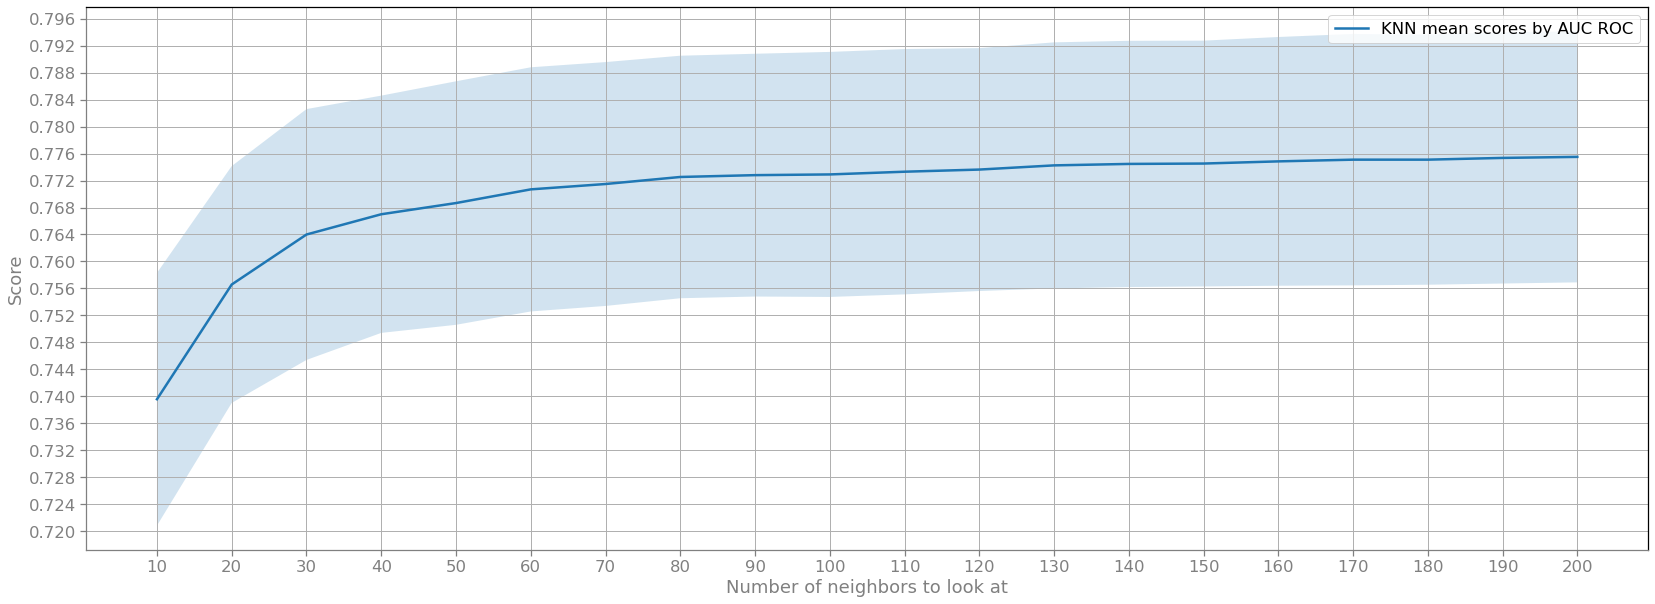

In [119]:
plt.figure(figsize=(28, 10))
plt.xticks(neighbors_range)
plt.yticks(np.arange(0.7, 0.8, 0.004))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=neighbors_range, y=knn_grid.cv_results_["mean_test_score"], label="KNN mean scores by AUC ROC")
ax.fill_between(x=neighbors_range, alpha=0.2, 
                y1=knn_grid.cv_results_["mean_test_score"] - knn_grid.cv_results_["std_test_score"], 
                y2=knn_grid.cv_results_["mean_test_score"] + knn_grid.cv_results_["std_test_score"])
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Number of neighbors to look at", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.tick_params(axis="both", colors=tick_color)

**#** **Decision tree**

In [120]:
%%capture

max_depth_range = range(1, 21, 1)
dt_grid = GridSearchCV(DecisionTreeClassifier(), {"max_depth":max_depth_range}, cv=5, n_jobs=-1, scoring="roc_auc")
dt_grid.fit(some_description, y)

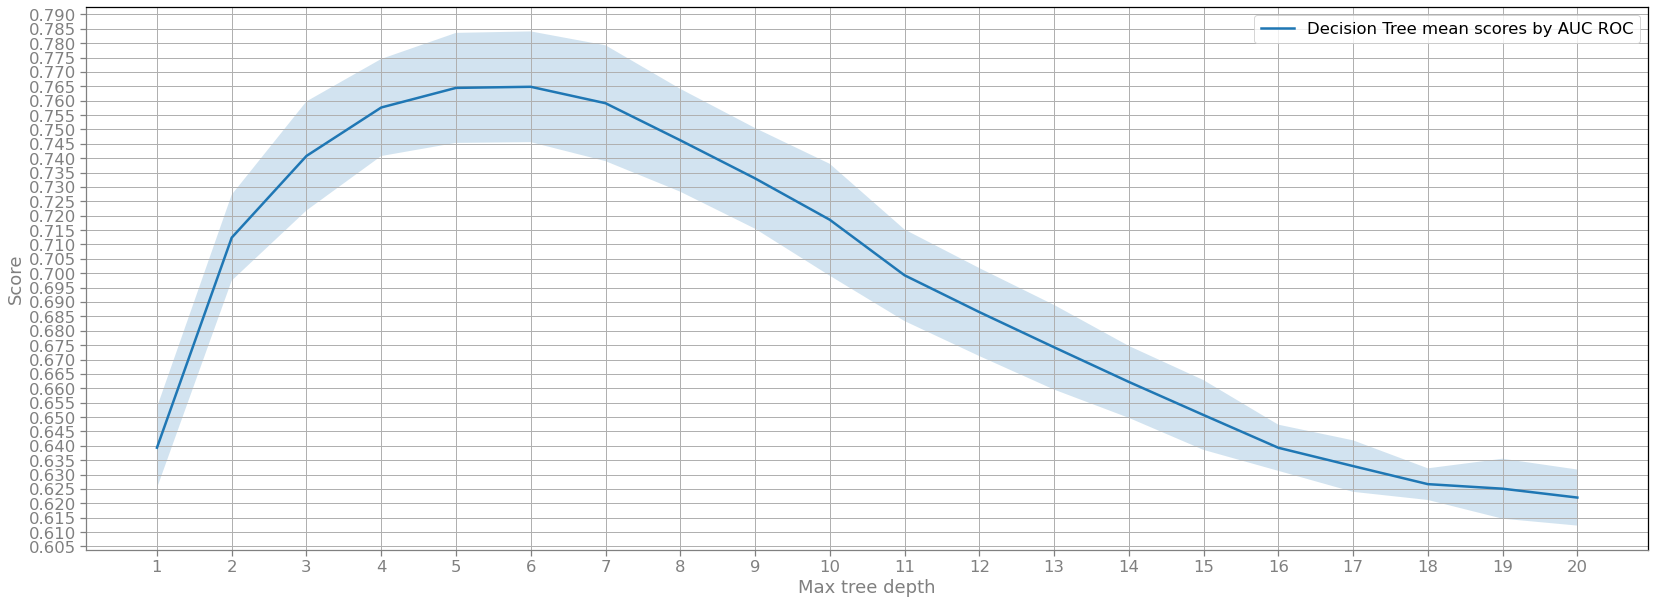

In [121]:
plt.figure(figsize=(28, 10))
plt.xticks(max_depth_range)
plt.yticks(np.arange(0.6, 0.8, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=max_depth_range, y=dt_grid.cv_results_["mean_test_score"], label="Decision Tree mean scores by AUC ROC")
ax.fill_between(x=max_depth_range, alpha=0.2, 
                y1=dt_grid.cv_results_["mean_test_score"] - dt_grid.cv_results_["std_test_score"], 
                y2=dt_grid.cv_results_["mean_test_score"] + dt_grid.cv_results_["std_test_score"])
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Max tree depth", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.tick_params(axis="both", colors=tick_color)

**#** **Stochastic Gradient Descent**

In [122]:
%%capture

loss_funcs = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
sgd = linear_model.SGDClassifier(n_jobs=-1)
sgd_grid = GridSearchCV(sgd, {"loss":loss_funcs}, cv=5, n_jobs=-1, scoring="roc_auc")
sgd_grid.fit(some_description, y)

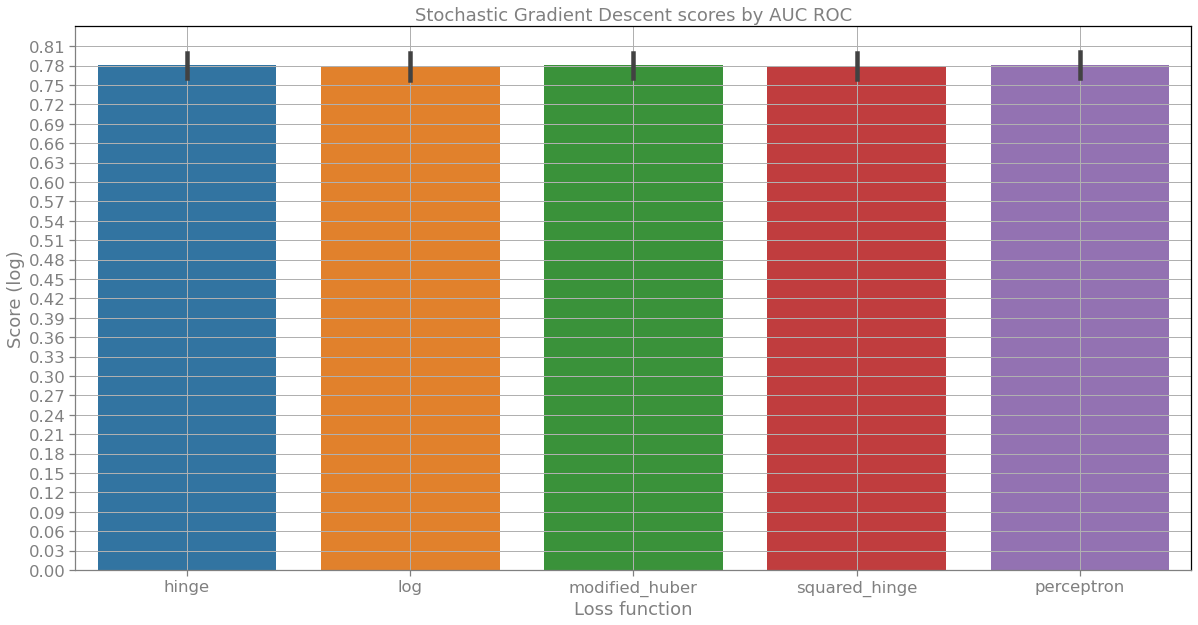

In [123]:
plt.figure(figsize=(20, 10))
plt.yticks(np.arange(0, 0.81, 0.03))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x=loss_funcs * 5,y=[*sgd_grid.cv_results_["split0_test_score"], *sgd_grid.cv_results_["split1_test_score"],
                                 *sgd_grid.cv_results_["split2_test_score"], *sgd_grid.cv_results_["split3_test_score"],
                                 *sgd_grid.cv_results_["split4_test_score"]], ci="sd")
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_title("Stochastic Gradient Descent scores by AUC ROC", color=tick_color)
ax.set_xlabel("Loss function", color=tick_color)
ax.set_ylabel("Score (log)", color=tick_color)
ax.tick_params(axis="both", colors=tick_color)

**(0.5 балл) Задание 3.** Теперь подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев: обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте найденное количество деревьев.

Применить класс *GridSearchCV* в данном задании затруднительно, поэтому предлагается самостоятельно написать цикл по числу деревьев.

In [124]:
%%capture

kf = KFold(n_splits=5, shuffle=False)
n_trees = 100
rnd_dts, test_indices = [], []
for train_ind, test_ind in kf.split(some_description):
    rnd_dts.append(RandomForestClassifier(n_estimators=n_trees, n_jobs=-1))
    rnd_dts[-1].fit(some_description.iloc[train_ind], y.iloc[train_ind])
    test_indices.append(test_ind)

mean_test_scores, std_test_scores = [], []
for j in range(n_trees):
    mean = 0
    scores = []
    for i in range(5):
        scores.append(roc_auc_score(y.iloc[test_indices[i]].values,[arr[1] for arr in rnd_dts[i].predict_proba(some_description.iloc[test_indices[i]])]))
        mean += scores[-1]
    mean /= 5
    dispersion = 0
    for i in range(5):
        dispersion += (scores[i] - mean) ** 2
        rnd_dts[i].estimators_.pop()
    dispersion /= 5
    mean_test_scores.append(mean)
    std_test_scores.append(sqrt(dispersion))
mean_test_scores = np.array(mean_test_scores[::-1])
std_test_scores = np.array(std_test_scores[::-1])

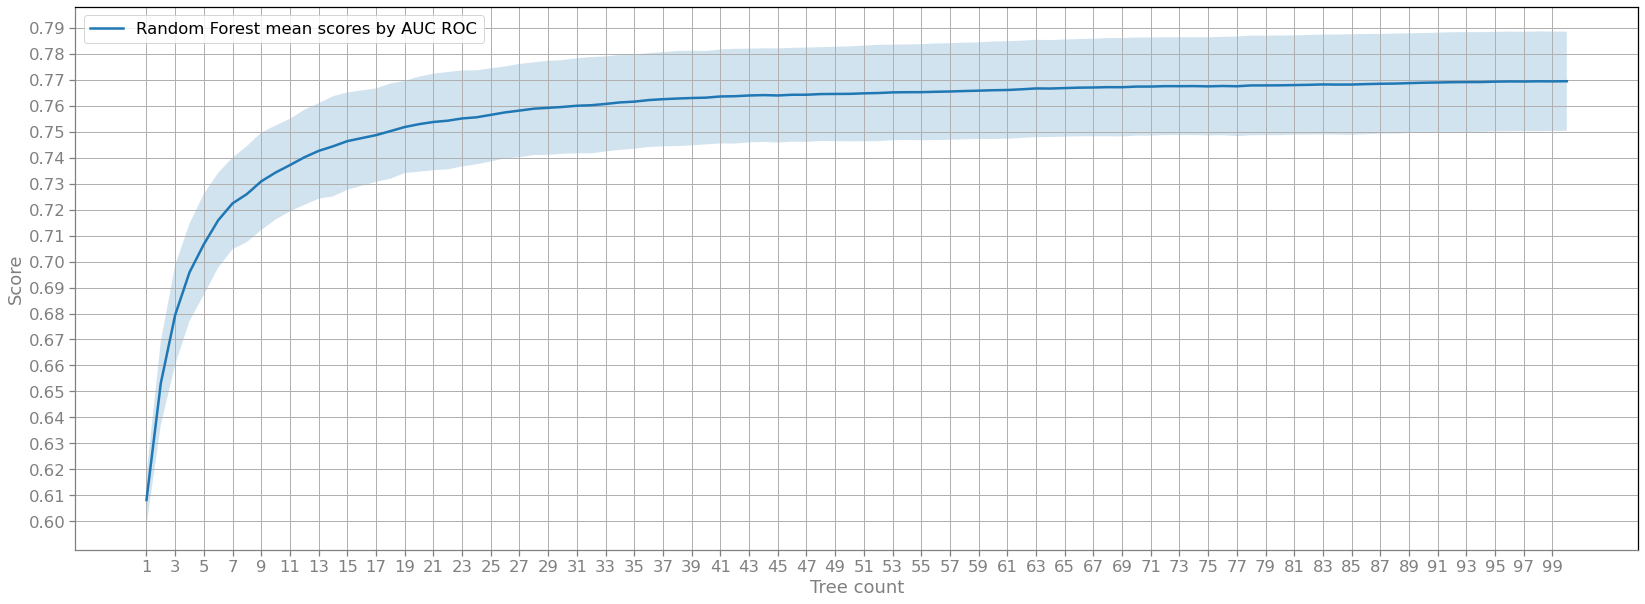

In [125]:
plt.figure(figsize=(28, 10))
plt.xticks(range(1, n_trees + 1, 2))
plt.yticks(np.arange(0.6, 0.8, 0.01))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=range(1, n_trees + 1), y=mean_test_scores, label="Random Forest mean scores by AUC ROC")
ax.fill_between(x=range(1, n_trees + 1), alpha=0.2, 
                y1=mean_test_scores - std_test_scores, 
                y2=mean_test_scores + std_test_scores)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Tree count", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper left")
ax.tick_params(axis="both", colors=tick_color)


При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**(1 балл) Задание 4.** Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

**#** Gold измеряется в тысячах. Среднее значение -- 3000, стандартное отклонение -- 1000.
LH измеряется в десятках. Среднее -- 30.

**#** Такое неравномерное распределение параметров может плохо сказаться на качестве работы алгоритмов. 
Например для градиентого спуска очень важно нормирование 
(при нормированных признаках антиградиент всегда будет указывать на минимум функции, а при отсутствии нормирования есть вериятность того, что оптимум вообще не будет найден)

**#** kNN по понятным причинам так же требует нормализованных признаков (от их масштаба напрямую зависит расстояние между вершинами)

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**(1 балл) Задание 5.** Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество некоторых алгоритмов и почему?

**#** Все признаки были нормализованы. Изменение качества:

    kNN              Небольшое улучшение качества
    Decision tree    Качество не изменилось
    SGD              Качество не изменилось, а местами (perceptron, squared_hinge) немного ухудшилось
    Random forest    Качество не изменилось

In [127]:
scaled_gold = pd.DataFrame(scale(gold_for_join), index=gold_for_join.index, columns=gold_for_join.columns)
scaled_lh = pd.DataFrame(scale(lh_for_join), index=lh_for_join.index, columns=lh_for_join.columns)
all_data = train.join(scaled_gold.join(scaled_lh, lsuffix="_gold", rsuffix="_lh")).dropna().sort_index()
all_data = all_data.set_index(["patch", all_data.index])
radiant_gold_desc = all_data.loc[:, "player_0_gold":"player_4_gold"].agg([sum, max, min], axis="columns")
dire_gold_desc = all_data.loc[:, "player_5_gold":"player_9_gold"].agg([sum, max, min], axis="columns")
radiant_lh_desc = all_data.loc[:, "player_0_lh":"player_4_lh"].agg([sum, max, min], axis="columns")
dire_lh_desc = all_data.loc[:, "player_5_lh":"player_9_lh"].agg([sum, max, min], axis="columns")
X_scaled = radiant_gold_desc.join(dire_gold_desc, lsuffix="_rad_gold", rsuffix="_dire_gold").join(radiant_lh_desc.join(dire_lh_desc, lsuffix="_rad_lh", rsuffix="_dire_lh"))
X_scaled

sum_rad_gold  max_rad_gold  min_rad_gold  sum_dire_gold  \
11 12048     -2.114561      1.403915     -1.465429      -1.081678   
   15026     -5.415276      0.228698     -1.707632       2.819603   
12 16204     -0.324136      1.188596     -1.325357       1.920885   
13 21874      1.922844      1.460883     -0.855456      -1.531614   
   23867     -0.870281      1.220085     -1.506337       0.179394   
...                ...           ...           ...            ...   
43 81460     -2.894803      0.586089     -1.716505       2.006575   
   81461      0.326481      1.337660     -1.257156      -3.068657   
   81462     -1.557226      0.709073     -1.219587       1.144241   
   81465      0.678549      1.600989     -1.154807      -1.461187   
   81466     -2.253317      1.122857     -1.367539       1.564547   

          max_dire_gold  min_dire_gold  sum_rad_lh  max_rad_lh  min_rad_lh  \
11 12048       1.185613      -1.222049   -1.631318    0.561735   -1.101380   
   15026       1.455688      -0.855658   -5.001236   -0.477536   -1.282919   
12 16204       1.960217      -0.766186   -1.736265    0.595296   -1.200465   
13 21874       0.774426      -1.295982   -0.441280    0.916294   -0.808839   
   23867       1.406850      -1.217568   -1.388814    1.231928   -1.302791   
...                 ...            ...         ...         ...         ...   
43 81460       2.816407      -1.646172   -1.754303    0.751383   -1.331801   
   81461       0.225516      -1.638675    0.892008    1.644198   -1.021407   
   81462       1.248034      -1.177839   -2.240771    0.235950   -1.302791   
   81465       1.162825      -1.447783    1.910649    1.644198   -0.938951   
   81466       1.313663      -0.980481   -1.857528    0.430245   -1.143172   

          sum_dire_lh  max_dire_lh  min_dire_lh  
11 12048    -2.218320     0.981830    -1.200603  
   15026    -1.348074     0.499462    -1.113353  
12 16204    -0.209072     1.131449    -1.170143  
13 21874    -1.729390     1.024025    -1.198345  
   23867     0.124304     1.637039    -0.900873  
...               ...          ...          ...  
43 81460     1.557011     2.774617    -1.459155  
   81461    -0.594804     0.846259    -1.270102  
   81462    -0.347200     1.235003    -1.270102  
   81465     0.771151     1.614763    -0.985865  
   81466    -0.243429     1.108416    -1.312235  

[26252 rows x 12 columns]

**k-Nearest Neighbor**

Features are stored in *X_scaled*

Answers are stored in *y*

In [128]:
%%capture

neighbors_range = range(10,151, 10)
knn = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(knn, {"n_neighbors":neighbors_range}, cv=5, n_jobs=-1, scoring="roc_auc")
knn_grid.fit(X_scaled, y)

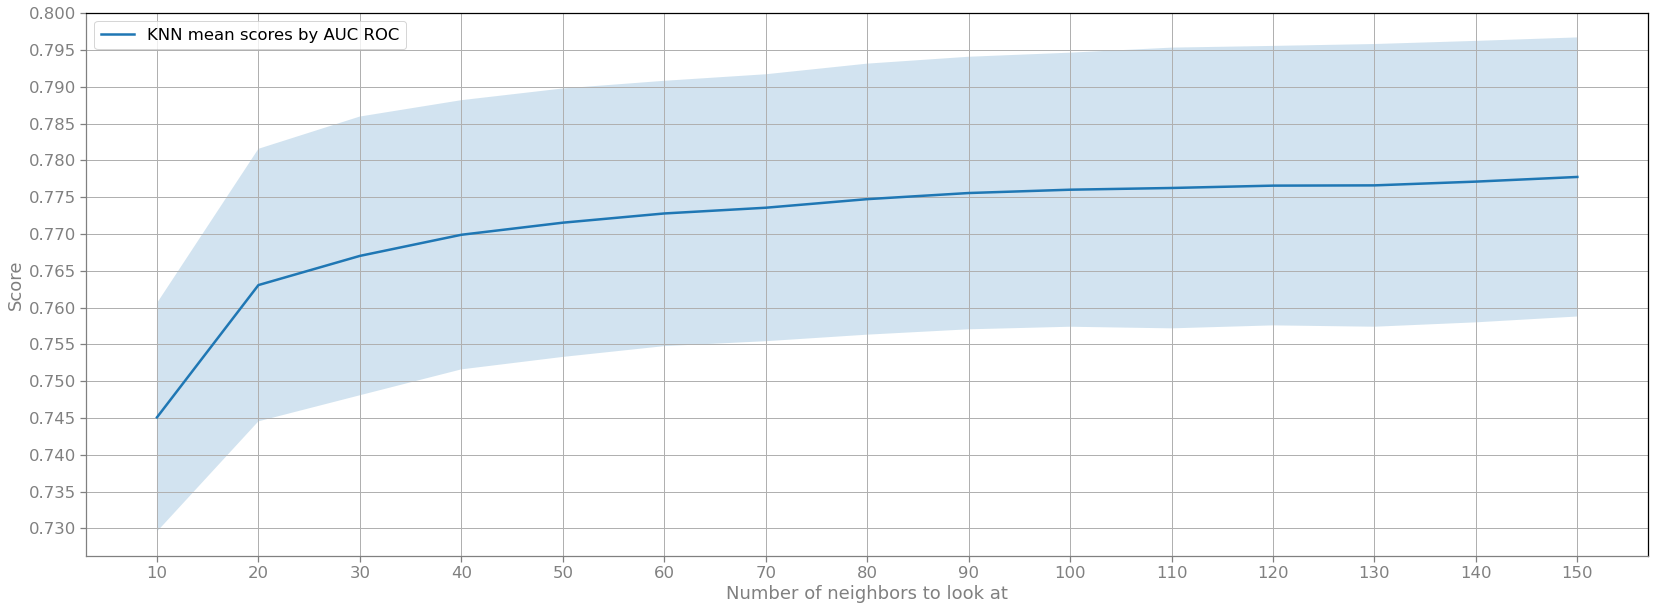

In [129]:
plt.figure(figsize=(28, 10))
plt.xticks(neighbors_range)
plt.yticks(np.arange(0.73, 0.8, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=neighbors_range, y=knn_grid.cv_results_["mean_test_score"], label="KNN mean scores by AUC ROC")
ax.fill_between(x=neighbors_range, alpha=0.2, 
                y1=knn_grid.cv_results_["mean_test_score"] - knn_grid.cv_results_["std_test_score"], 
                y2=knn_grid.cv_results_["mean_test_score"] + knn_grid.cv_results_["std_test_score"])
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Number of neighbors to look at", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper left")
ax.tick_params(axis="both", colors=tick_color)

**Decision tree**

In [130]:
%%capture

max_depth_range = range(1, 21, 1)
dt_grid = GridSearchCV(DecisionTreeClassifier(), {"max_depth":max_depth_range}, cv=5, n_jobs=-1, scoring="roc_auc")
dt_grid.fit(X_scaled, y)

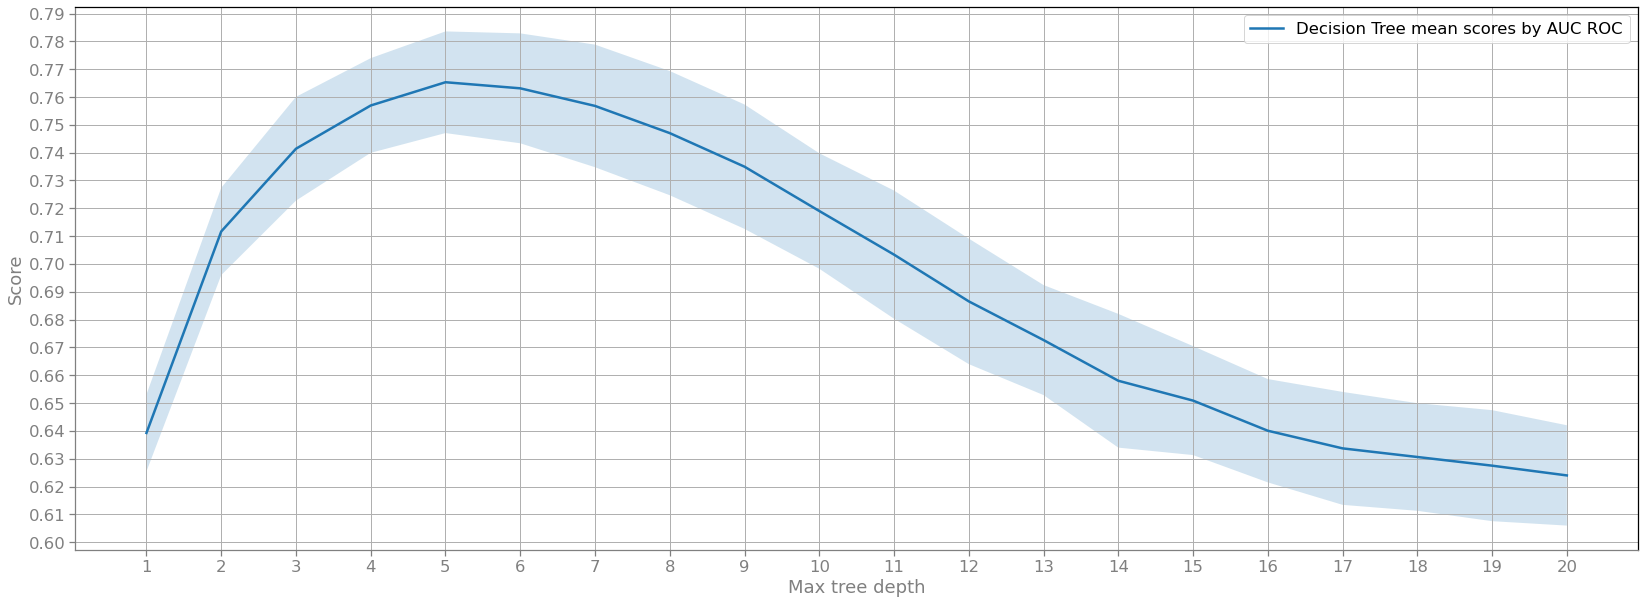

In [131]:
plt.figure(figsize=(28, 10))
plt.xticks(max_depth_range)
plt.yticks(np.arange(0.6, 0.8, 0.01))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=max_depth_range, y=dt_grid.cv_results_["mean_test_score"], label="Decision Tree mean scores by AUC ROC")
ax.fill_between(x=max_depth_range, alpha=0.2, 
                y1=dt_grid.cv_results_["mean_test_score"] - dt_grid.cv_results_["std_test_score"], 
                y2=dt_grid.cv_results_["mean_test_score"] + dt_grid.cv_results_["std_test_score"])
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Max tree depth", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.tick_params(axis="both", colors=tick_color)

**Stochastic Gradient Descent**

In [132]:
%%capture

loss_funcs = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
sgd = linear_model.SGDClassifier(n_jobs=-1)
sgd_grid = GridSearchCV(sgd, {"loss":loss_funcs}, cv=5, n_jobs=-1, scoring="roc_auc")
sgd_grid.fit(X_scaled, y)


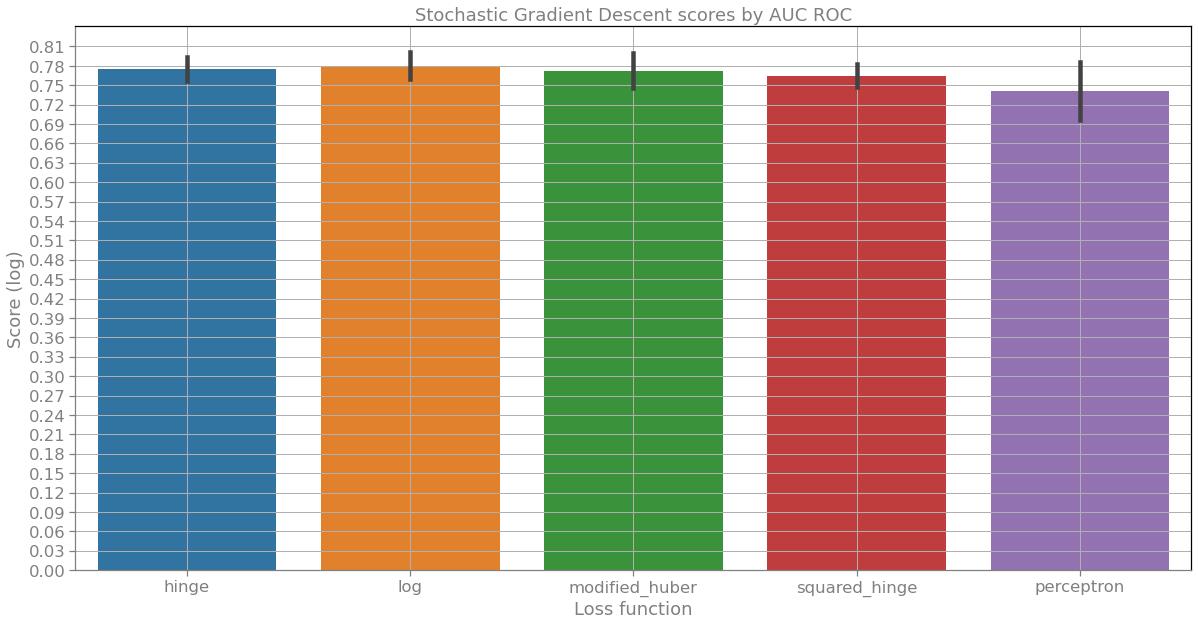

In [133]:
plt.figure(figsize=(20, 10))
plt.yticks(np.arange(0, 0.815, 0.03))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x=loss_funcs * 5,y=[*sgd_grid.cv_results_["split0_test_score"], *sgd_grid.cv_results_["split1_test_score"],
                                 *sgd_grid.cv_results_["split2_test_score"], *sgd_grid.cv_results_["split3_test_score"],
                                 *sgd_grid.cv_results_["split4_test_score"]], ci="sd")
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_title("Stochastic Gradient Descent scores by AUC ROC", color=tick_color)
ax.set_xlabel("Loss function", color=tick_color)
ax.set_ylabel("Score (log)", color=tick_color)
ax.tick_params(axis="both", colors=tick_color)

**Random Forest**

In [134]:
%%capture

kf = KFold(n_splits=5, shuffle=False)
n_trees = 100
rnd_dts, test_indices = [], []
for train_ind, test_ind in kf.split(X_scaled):
    rnd_dts.append(RandomForestClassifier(n_estimators=n_trees, n_jobs=-1))
    rnd_dts[-1].fit(X_scaled.iloc[train_ind], y.iloc[train_ind])
    test_indices.append(test_ind)

mean_test_scores, std_test_scores = [], []
for j in range(n_trees):
    mean = 0
    scores = []
    for i in range(5):
        scores.append(roc_auc_score(y.iloc[test_indices[i]].values, [arr[1] for arr in rnd_dts[i].predict_proba(X_scaled.iloc[test_indices[i]])]))
        mean += scores[-1]
    mean /= 5
    dispersion = 0
    for i in range(5):
        dispersion += (scores[i] - mean) ** 2
        rnd_dts[i].estimators_.pop()
    dispersion /= 5
    mean_test_scores.append(mean)
    std_test_scores.append(sqrt(dispersion))
mean_test_scores = np.array(mean_test_scores[::-1])
std_test_scores = np.array(std_test_scores[::-1])

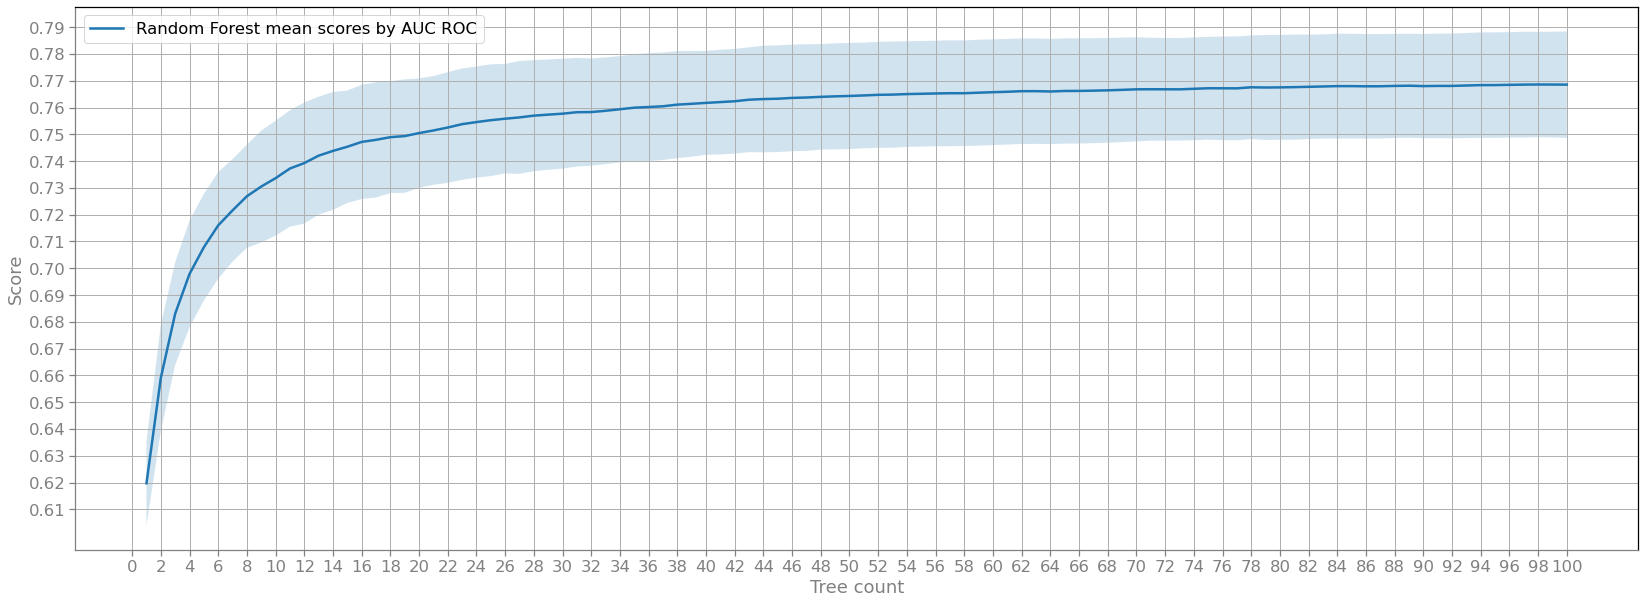

In [135]:
plt.figure(figsize=(28, 10))
plt.xticks(range(0, n_trees + 1, 2))
plt.yticks(np.arange(0.61, 0.8, 0.01))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=range(1, n_trees + 1), y=mean_test_scores, label="Random Forest mean scores by AUC ROC")
ax.fill_between(x=range(1, n_trees + 1), alpha=0.2, 
                y1=mean_test_scores - std_test_scores, 
                y2=mean_test_scores + std_test_scores)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Tree count", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper left")
ax.tick_params(axis="both", colors=tick_color)

**(1.5 балла) Задание 6.** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и максимальное число рассматриваемых признаков (*max_features*); используйте найденное ранее каличество деревьев
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели".

Какой из алгоритмов имеет наилучшее качество? 

**#** Лучшее качество показывают алгоритмы градиентного спуска с шарнирной и логарифмической функциями потерь (все около 0.78).

**k-Nearest Neighbor**

Features are stored in *X_scaled*

Answers are stored in *y*

In [136]:
%%capture

neighbors_range = range(10, 151, 10)
metrics = ["euclidean", "manhattan", "chebyshev"]
knn = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(knn, {"n_neighbors":neighbors_range, "metric":metrics}, cv=5, n_jobs=-1, scoring="roc_auc")
knn_grid.fit(X_scaled, y)

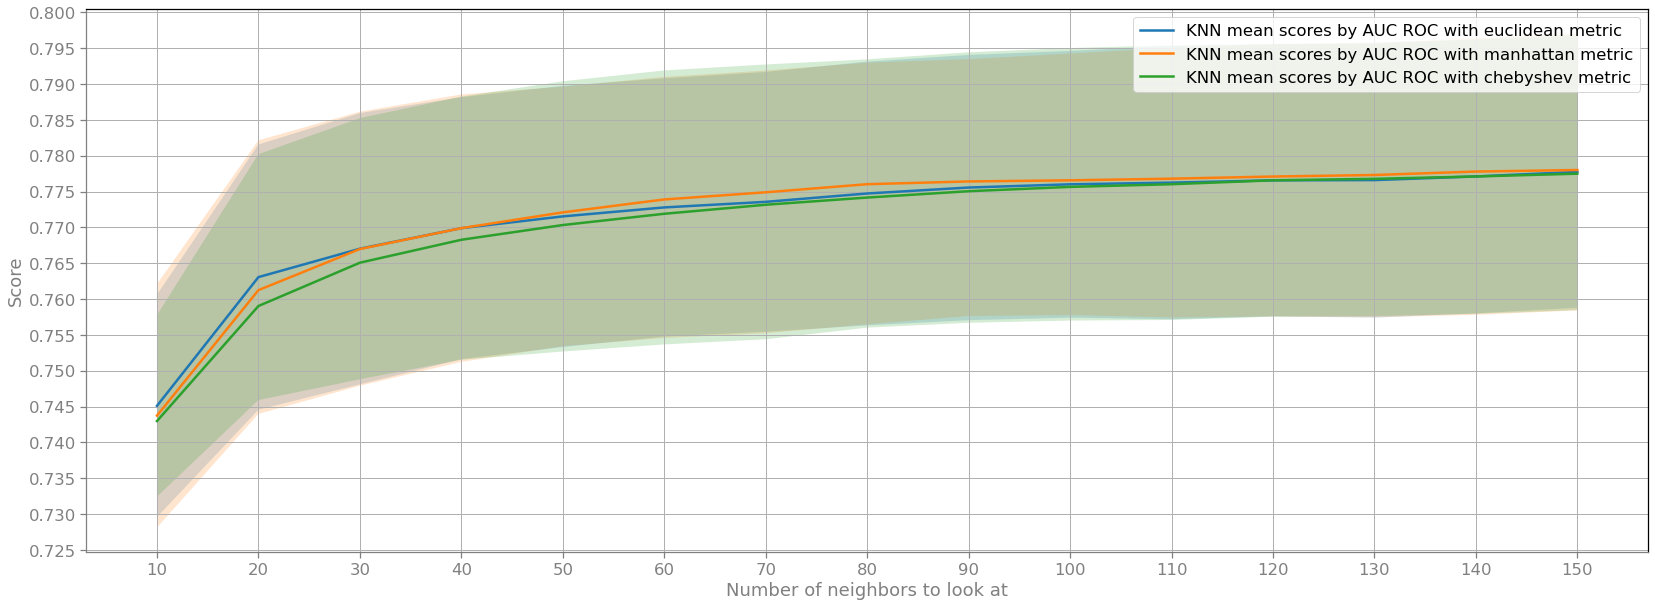

In [137]:
plt.figure(figsize=(28, 10))
plt.xticks(neighbors_range)
plt.yticks(np.arange(0.725, 0.8, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=neighbors_range, y=knn_grid.cv_results_["mean_test_score"][:len(neighbors_range)], label="KNN mean scores by AUC ROC with euclidean metric")
ax.fill_between(x=neighbors_range, alpha=0.2, 
                y1=knn_grid.cv_results_["mean_test_score"][:len(neighbors_range)] - knn_grid.cv_results_["std_test_score"][:len(neighbors_range)], 
                y2=knn_grid.cv_results_["mean_test_score"][:len(neighbors_range)] + knn_grid.cv_results_["std_test_score"][:len(neighbors_range)])
sns.lineplot(x=neighbors_range, y=knn_grid.cv_results_["mean_test_score"][len(neighbors_range):2*len(neighbors_range)], label="KNN mean scores by AUC ROC with manhattan metric")
ax.fill_between(x=neighbors_range, alpha=0.2, 
                y1=knn_grid.cv_results_["mean_test_score"][:len(neighbors_range)] - knn_grid.cv_results_["std_test_score"][len(neighbors_range):2*len(neighbors_range)], 
                y2=knn_grid.cv_results_["mean_test_score"][:len(neighbors_range)] + knn_grid.cv_results_["std_test_score"][len(neighbors_range):2*len(neighbors_range)])
sns.lineplot(x=neighbors_range, y=knn_grid.cv_results_["mean_test_score"][2*len(neighbors_range):], label="KNN mean scores by AUC ROC with chebyshev metric")
ax.fill_between(x=neighbors_range, alpha=0.2, 
                y1=knn_grid.cv_results_["mean_test_score"][:len(neighbors_range)] - knn_grid.cv_results_["std_test_score"][2*len(neighbors_range):], 
                y2=knn_grid.cv_results_["mean_test_score"][:len(neighbors_range)] + knn_grid.cv_results_["std_test_score"][2*len(neighbors_range):])
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Number of neighbors to look at", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.tick_params(axis="both", colors=tick_color)

**Decision tree**

In [138]:
%%capture

max_depth_range = range(1, 11, 1)
criterions = ["gini", "entropy"]
dt_grid = GridSearchCV(DecisionTreeClassifier(), {"max_depth":max_depth_range, "criterion":criterions}, cv=5, n_jobs=-1, scoring="roc_auc")
dt_grid.fit(X_scaled, y)

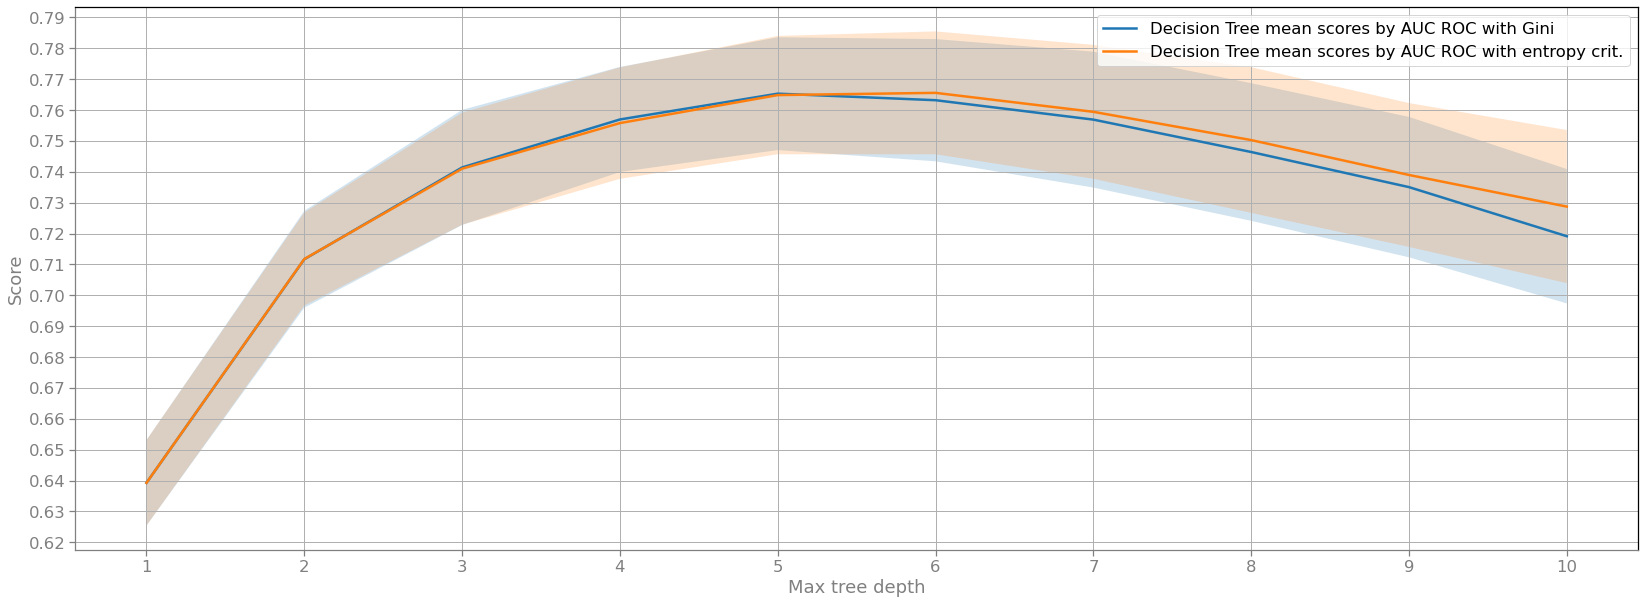

In [139]:
plt.figure(figsize=(28, 10))
plt.xticks(max_depth_range)
plt.yticks(np.arange(0.6, 0.8, 0.01))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=max_depth_range, y=dt_grid.cv_results_["mean_test_score"][:len(max_depth_range)], label="Decision Tree mean scores by AUC ROC with Gini")
ax.fill_between(x=max_depth_range, alpha=0.2, 
                y1=dt_grid.cv_results_["mean_test_score"][:len(max_depth_range)] - dt_grid.cv_results_["std_test_score"][:len(max_depth_range)], 
                y2=dt_grid.cv_results_["mean_test_score"][:len(max_depth_range)] + dt_grid.cv_results_["std_test_score"][:len(max_depth_range)])
sns.lineplot(x=max_depth_range, y=dt_grid.cv_results_["mean_test_score"][len(max_depth_range):], label="Decision Tree mean scores by AUC ROC with entropy crit.")
ax.fill_between(x=max_depth_range, alpha=0.2, 
                y1=dt_grid.cv_results_["mean_test_score"][len(max_depth_range):] - dt_grid.cv_results_["std_test_score"][len(max_depth_range):], 
                y2=dt_grid.cv_results_["mean_test_score"][len(max_depth_range):] + dt_grid.cv_results_["std_test_score"][len(max_depth_range):])
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Max tree depth", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.tick_params(axis="both", colors=tick_color)

**Stochastic Gradient Descent**

In [140]:
%%capture

loss_funcs = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
penalties = ["l2", "l1", "elasticnet"]
sgd = linear_model.SGDClassifier(n_jobs=-1)
sgd_grid = GridSearchCV(sgd, {"loss":loss_funcs, "penalty":penalties}, cv=5, n_jobs=-1, scoring="roc_auc")
sgd_grid.fit(X_scaled, y)


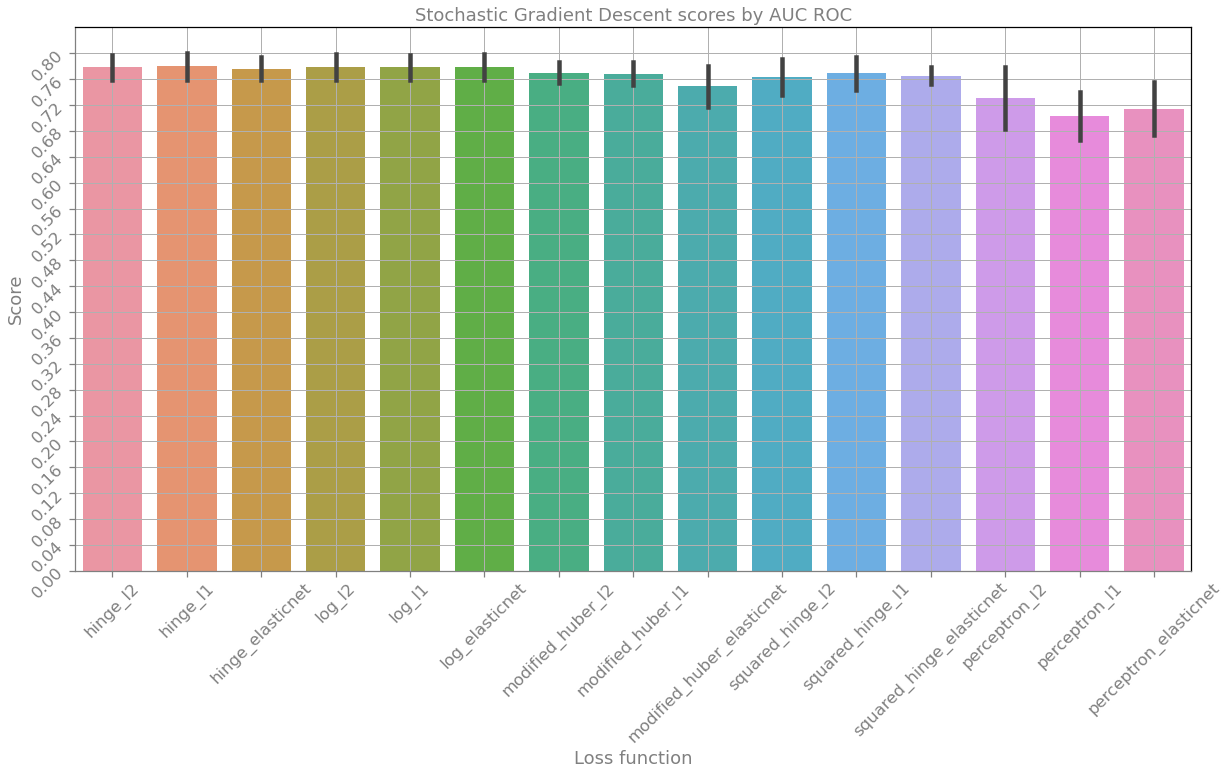

In [150]:
plt.figure(figsize=(20, 10))
plt.yticks(np.arange(0, 0.805, 0.04))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x=[func + "_" + pen for func in loss_funcs for pen in penalties] * 5,y=[*sgd_grid.cv_results_["split0_test_score"], *sgd_grid.cv_results_["split1_test_score"],
                                 *sgd_grid.cv_results_["split2_test_score"], *sgd_grid.cv_results_["split3_test_score"],
                                 *sgd_grid.cv_results_["split4_test_score"]], ci="sd")
# ax.set_yscale("log")
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_title("Stochastic Gradient Descent scores by AUC ROC", color=tick_color)
ax.set_xlabel("Loss function", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.tick_params(axis="both", colors=tick_color, labelrotation=45)

**Random Forest**

In [142]:
%%capture

kf = KFold(n_splits=5, shuffle=False)
n_trees = 100
rnd_dts, test_indices = [], []
for train_ind, test_ind in kf.split(X_scaled):
    rnd_dts.append(RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, criterion="gini"))
    rnd_dts[-1].fit(X_scaled.iloc[train_ind], y.iloc[train_ind])
    rnd_dts.append(RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, criterion="entropy"))
    rnd_dts[-1].fit(X_scaled.iloc[train_ind], y.iloc[train_ind])
    test_indices.append(test_ind)

mean_test_scores, std_test_scores = [], []
for j in range(n_trees):
    mean = 0
    scores = []
    for i in range(5):
        scores.append(roc_auc_score(y.iloc[test_indices[i]].values, [arr[1] for arr in rnd_dts[i*2].predict_proba(X_scaled.iloc[test_indices[i]])]))
        mean += scores[-1]
    mean /= 5
    dispersion = 0
    for i in range(5):
        dispersion += (scores[i] - mean) ** 2
        rnd_dts[i*2].estimators_.pop()
    dispersion /= 5
    mean_test_scores.append(mean)
    std_test_scores.append(sqrt(dispersion))
    mean = 0
    scores = []
    for i in range(5):
        scores.append(roc_auc_score(y.iloc[test_indices[i]].values, [arr[1] for arr in rnd_dts[i*2+1].predict_proba(X_scaled.iloc[test_indices[i]])]))
        mean += scores[-1]
    mean /= 5
    dispersion = 0
    for i in range(5):
        dispersion += (scores[i] - mean) ** 2
        rnd_dts[i*2+1].estimators_.pop()
    dispersion /= 5
    mean_test_scores.append(mean)
    std_test_scores.append(sqrt(dispersion))
mean_test_scores = np.array(mean_test_scores[::-1])
std_test_scores = np.array(std_test_scores[::-1])

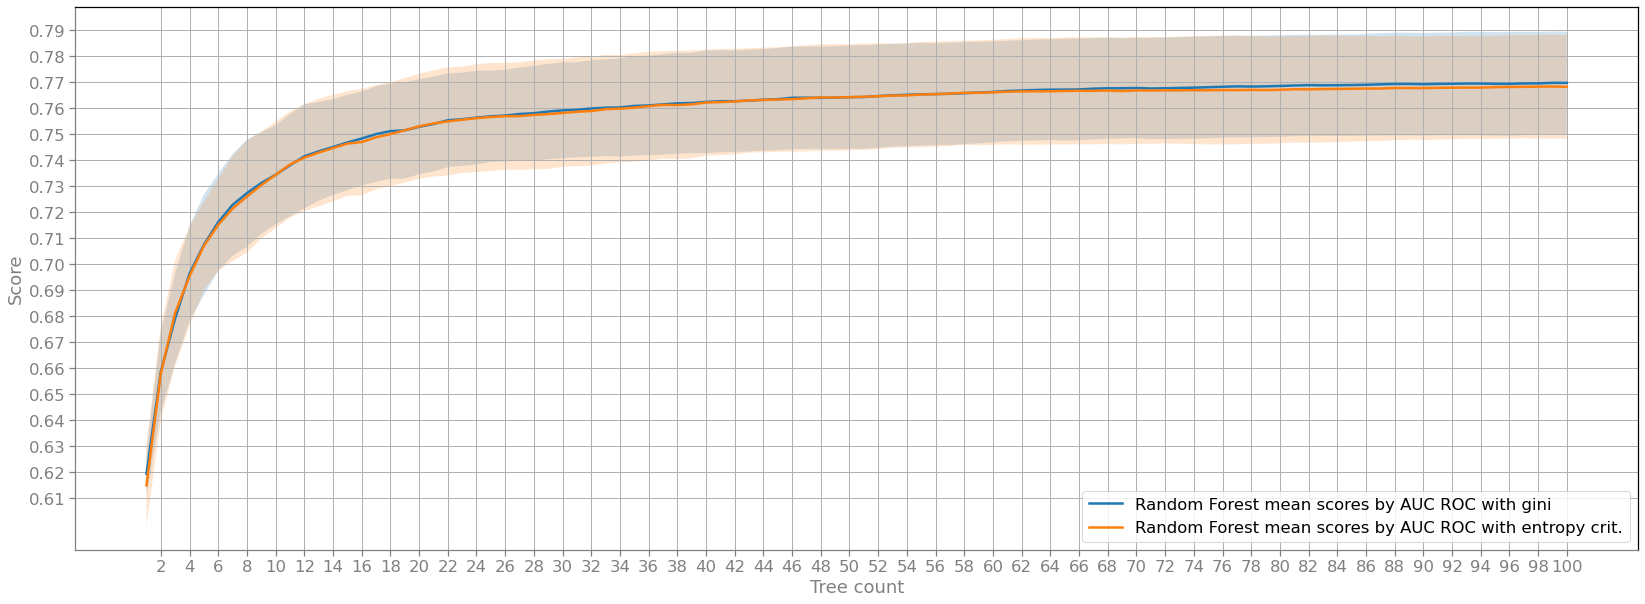

In [143]:
plt.figure(figsize=(28, 10))
plt.xticks(range(2, n_trees + 1, 2))
plt.yticks(np.arange(0.61, 0.8, 0.01))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=range(1, n_trees + 1), y=mean_test_scores[::2], label="Random Forest mean scores by AUC ROC with gini")
ax.fill_between(x=range(1, n_trees + 1), alpha=0.2, 
                y1=mean_test_scores[::2] - std_test_scores[::2], 
                y2=mean_test_scores[::2] + std_test_scores[::2])
sns.lineplot(x=range(1, n_trees + 1), y=mean_test_scores[1::2], label="Random Forest mean scores by AUC ROC with entropy crit.")
ax.fill_between(x=range(1, n_trees + 1), alpha=0.2, 
                y1=mean_test_scores[1::2] - std_test_scores[1::2], 
                y2=mean_test_scores[1::2] + std_test_scores[1::2])
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Tree count", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="lower right")
ax.tick_params(axis="both", colors=tick_color)


**(1.5 балла) Задание 7.** Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

**#1** С ростом числа объектов как правило качество на тестовой выборке улучшается, а на обучающей падает.
Это обусловлено тем, что при небольшом числе объектов трудно разглядеть зависимость между ними
и алгоритмы просто подстраиваются под обучающую выборку (происходит переобучение).
В алгоритме SGD, где мы штрафуем функцию за переобучение, различие между качеством на обучающей и тестовой выборках менее заметно.

**#2** Отношение качества на обучающей выборке к качеству на тестовой выборке характеризует переобучение модели

**#3** kNN насыщается уже при 2000 объектов. 
SGD менее уязвим к переобучению и насыщается практически мгновенно, но наилучший результат всё равно требует большой выборки (хотя бы 10-15 тысяч объектов)

**#4** Вряд ли при добавлении новых объектов произойдёт значительное увеличение качества, тем не менее дерево решений и основанная на нём модель случайного леса ещё не насытились до конца.

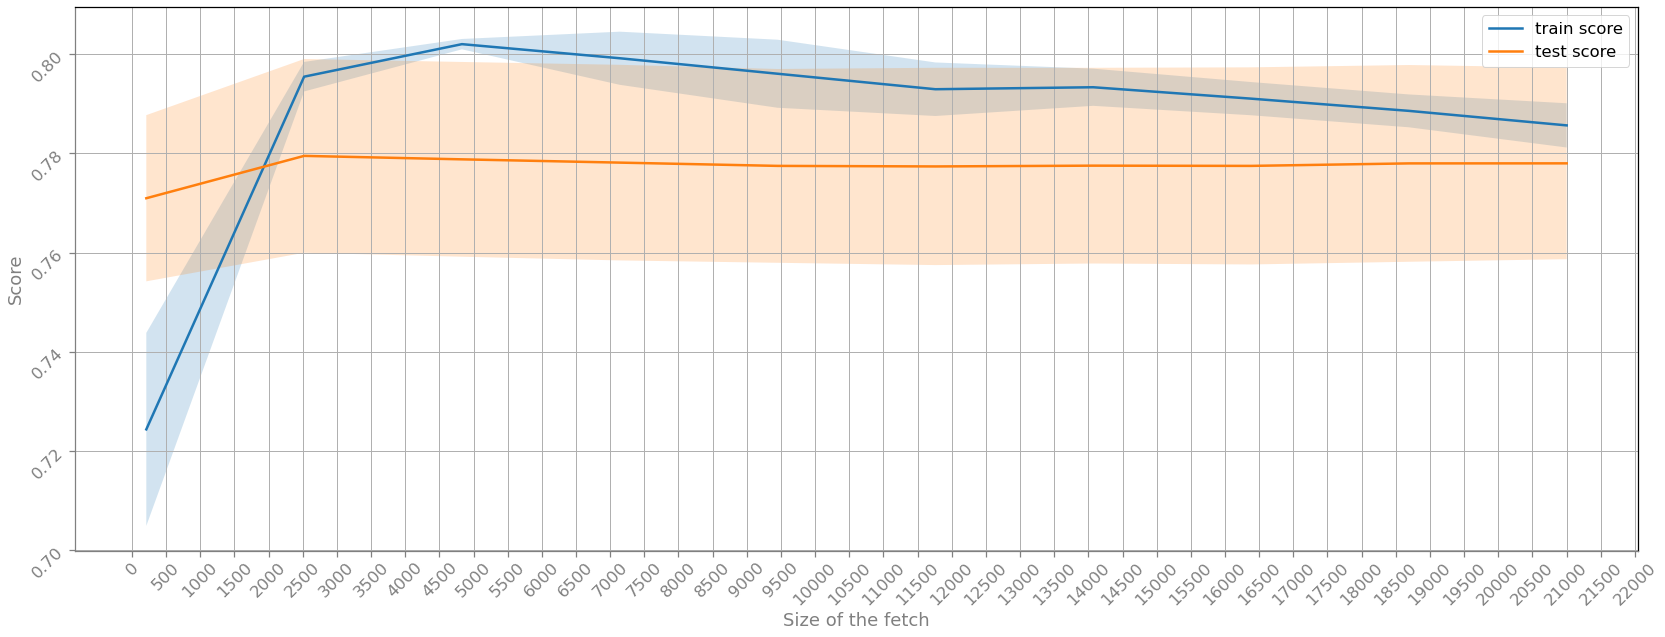

In [152]:
train_sizes, train_scores, valid_scores = learning_curve(
    KNeighborsClassifier(n_jobs=-1, n_neighbors=150, metric="manhattan"),
    X_scaled, y, cv=5, train_sizes=np.linspace(0.01, 1, 10), n_jobs=-1, scoring="roc_auc")

train_mean = np.array([arr.mean() for arr in train_scores])
train_std = np.array([arr.std() for arr in train_scores])
test_mean = np.array([arr.mean() for arr in valid_scores])
test_std = np.array([arr.std() for arr in valid_scores])

plt.figure(figsize=(28, 10))
plt.xticks(range(0, len(X_scaled), 500))
# plt.yticks(np.arange(0.6, 0.72, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=train_sizes, y=train_mean, label="train score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=train_mean - train_std, 
                y2=train_mean + train_std)
sns.lineplot(x=train_sizes, y=test_mean, label="test score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=test_mean - test_std, 
                y2=test_mean + test_std)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Size of the fetch", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper right")
ax.tick_params(axis="both", colors=tick_color, labelrotation=45)

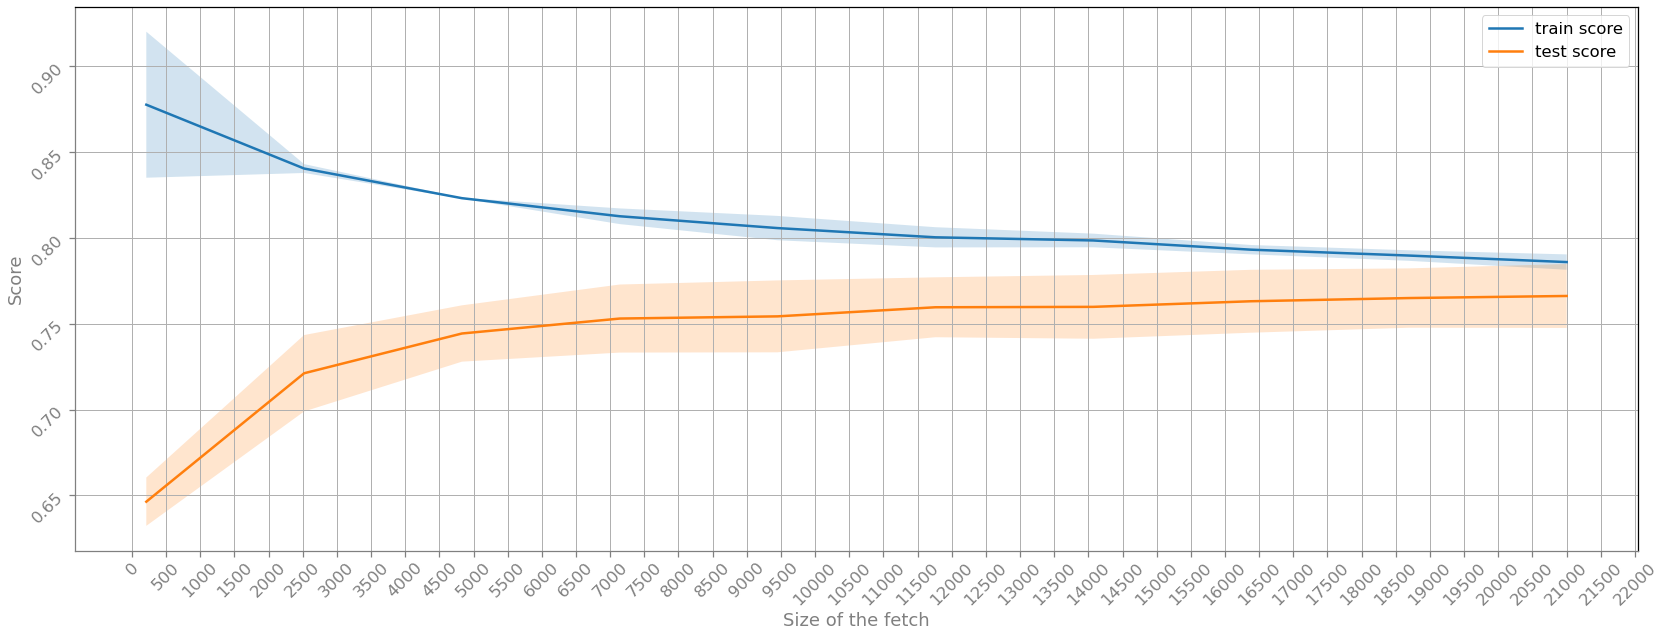

In [153]:
train_sizes, train_scores, valid_scores = learning_curve(
    DecisionTreeClassifier(max_depth=6, criterion="entropy"),
    X_scaled, y, cv=5, train_sizes=np.linspace(0.01, 1, 10), n_jobs=-1, scoring="roc_auc")

train_mean = np.array([arr.mean() for arr in train_scores])
train_std = np.array([arr.std() for arr in train_scores])
test_mean = np.array([arr.mean() for arr in valid_scores])
test_std = np.array([arr.std() for arr in valid_scores])

plt.figure(figsize=(28, 10))
plt.xticks(range(0, len(X_scaled), 500))
# plt.yticks(np.arange(0.6, 0.72, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=train_sizes, y=train_mean, label="train score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=train_mean - train_std, 
                y2=train_mean + train_std)
sns.lineplot(x=train_sizes, y=test_mean, label="test score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=test_mean - test_std, 
                y2=test_mean + test_std)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Size of the fetch", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper right")
ax.tick_params(axis="both", colors=tick_color, labelrotation=45)

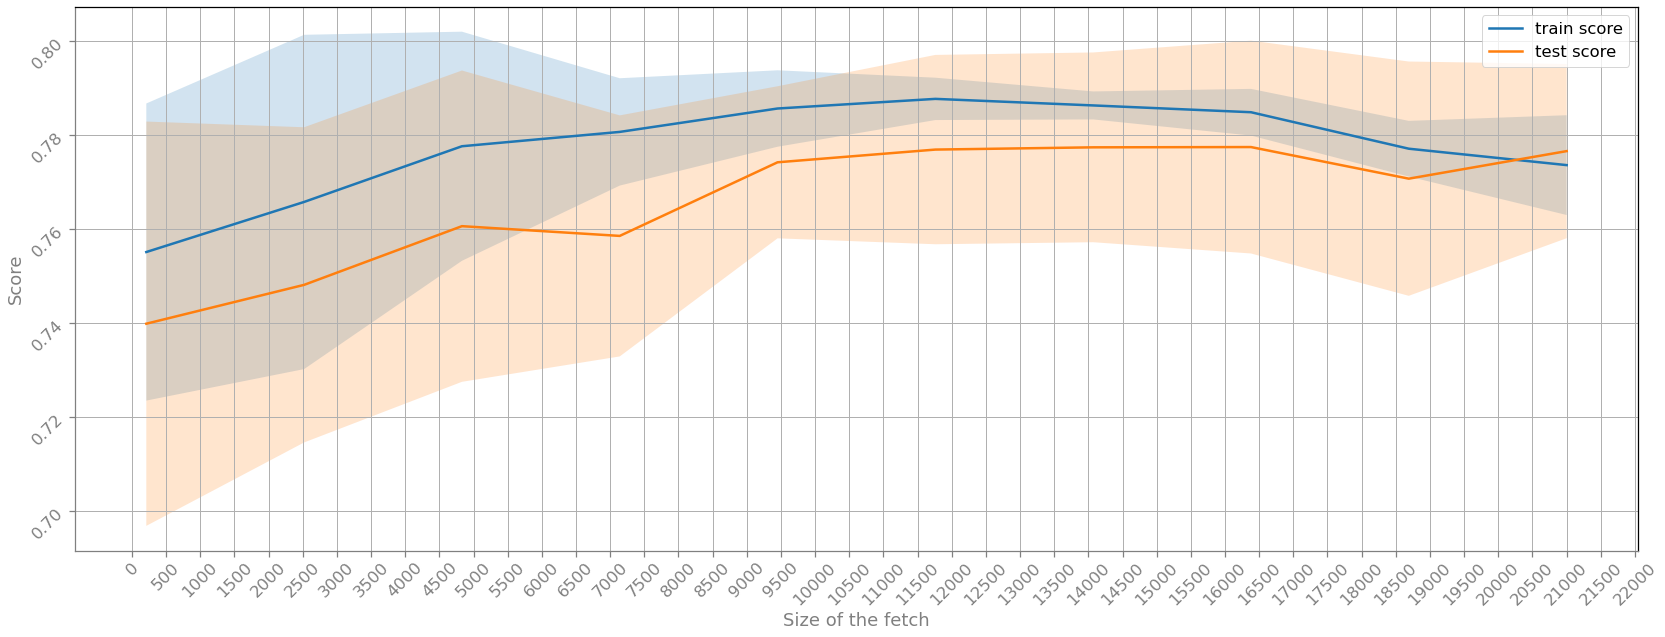

In [154]:
train_sizes, train_scores, valid_scores = learning_curve(
    linear_model.SGDClassifier(n_jobs=-1, loss="hinge", penalty="l1"),
    X_scaled, y, cv=5, train_sizes=np.linspace(0.01, 1, 10), n_jobs=-1, scoring="roc_auc")

train_mean = np.array([arr.mean() for arr in train_scores])
train_std = np.array([arr.std() for arr in train_scores])
test_mean = np.array([arr.mean() for arr in valid_scores])
test_std = np.array([arr.std() for arr in valid_scores])

plt.figure(figsize=(28, 10))
plt.xticks(range(0, len(X_scaled), 500))
# plt.yticks(np.arange(0.6, 0.72, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=train_sizes, y=train_mean, label="train score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=train_mean - train_std, 
                y2=train_mean + train_std)
sns.lineplot(x=train_sizes, y=test_mean, label="test score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=test_mean - test_std, 
                y2=test_mean + test_std)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Size of the fetch", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper right")
ax.tick_params(axis="both", colors=tick_color, labelrotation=45)

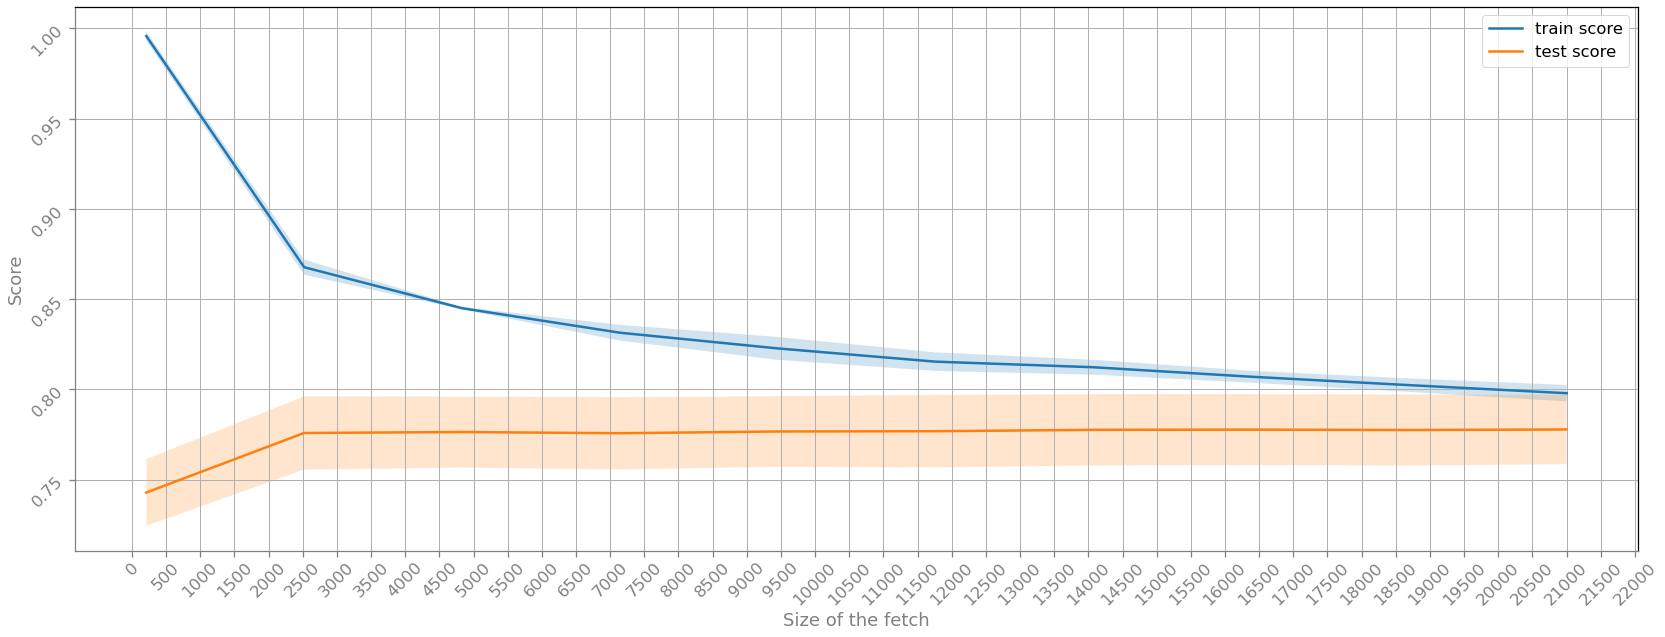

In [164]:
train_sizes, train_scores, valid_scores = learning_curve(
    RandomForestClassifier(n_estimators=70, n_jobs=-1, criterion="entropy", max_depth=6),
    X_scaled, y, cv=5, train_sizes=np.linspace(0.01, 1, 10), n_jobs=-1, scoring="roc_auc")

train_mean = np.array([arr.mean() for arr in train_scores])
train_std = np.array([arr.std() for arr in train_scores])
test_mean = np.array([arr.mean() for arr in valid_scores])
test_std = np.array([arr.std() for arr in valid_scores])

plt.figure(figsize=(28, 10))
plt.xticks(range(0, len(X_scaled), 500))
# plt.yticks(np.arange(0.6, 0.72, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=train_sizes, y=train_mean, label="train score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=train_mean - train_std, 
                y2=train_mean + train_std)
sns.lineplot(x=train_sizes, y=test_mean, label="test score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=test_mean - test_std, 
                y2=test_mean + test_std)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Size of the fetch", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper right")
ax.tick_params(axis="both", colors=tick_color, labelrotation=45)

### (2 балла) Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла) Задание 8.** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. В этом файле для каждой игры дан список героев. Напоминаем, что player_{0,1,2,3,4} – игроки команды radiant, player_{5,6,7,8,9} – игроки команды dire. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

In [156]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False, categories=[range(1,130)])
rad_heroes = enc.fit_transform(heroes.loc[:,"player_0":"player_0"]) + \
enc.fit_transform(heroes.loc[:,"player_1":"player_1"]) + \
enc.fit_transform(heroes.loc[:,"player_2":"player_2"]) + \
enc.fit_transform(heroes.loc[:,"player_3":"player_3"]) + \
enc.fit_transform(heroes.loc[:,"player_4":"player_4"])
dire_heroes = enc.fit_transform(heroes.loc[:,"player_5":"player_5"]) + \
enc.fit_transform(heroes.loc[:,"player_6":"player_6"]) + \
enc.fit_transform(heroes.loc[:,"player_7":"player_7"]) + \
enc.fit_transform(heroes.loc[:,"player_8":"player_8"]) + \
enc.fit_transform(heroes.loc[:,"player_9":"player_9"])

rad_heroes = pd.DataFrame(rad_heroes, index=heroes.index, 
                          columns=["rad_hero_" + str(i) for i in range(1, 130)], dtype=np.int8).loc[y.index.levels[1]]
dire_heroes = pd.DataFrame(dire_heroes, index=heroes.index, 
                           columns=["dire_hero_" + str(i) for i in range(1, 130)], dtype=np.int8).loc[y.index.levels[1]]
X = X_scaled.join(rad_heroes.join(dire_heroes), on=X_scaled.index.levels[1])
X = X.loc[:, (X != 0).any(axis="index")]
X

sum_rad_gold  max_rad_gold  min_rad_gold  sum_dire_gold  \
11 12048     -2.114561      1.403915     -1.465429      -1.081678   
   15026     -5.415276      0.228698     -1.707632       2.819603   
12 16204     -0.324136      1.188596     -1.325357       1.920885   
13 21874      1.922844      1.460883     -0.855456      -1.531614   
   23867     -0.870281      1.220085     -1.506337       0.179394   
...                ...           ...           ...            ...   
43 81460     -2.894803      0.586089     -1.716505       2.006575   
   81461      0.326481      1.337660     -1.257156      -3.068657   
   81462     -1.557226      0.709073     -1.219587       1.144241   
   81465      0.678549      1.600989     -1.154807      -1.461187   
   81466     -2.253317      1.122857     -1.367539       1.564547   

          max_dire_gold  min_dire_gold  sum_rad_lh  max_rad_lh  min_rad_lh  \
11 12048       1.185613      -1.222049   -1.631318    0.561735   -1.101380   
   15026       1.455688      -0.855658   -5.001236   -0.477536   -1.282919   
12 16204       1.960217      -0.766186   -1.736265    0.595296   -1.200465   
13 21874       0.774426      -1.295982   -0.441280    0.916294   -0.808839   
   23867       1.406850      -1.217568   -1.388814    1.231928   -1.302791   
...                 ...            ...         ...         ...         ...   
43 81460       2.816407      -1.646172   -1.754303    0.751383   -1.331801   
   81461       0.225516      -1.638675    0.892008    1.644198   -1.021407   
   81462       1.248034      -1.177839   -2.240771    0.235950   -1.302791   
   81465       1.162825      -1.447783    1.910649    1.644198   -0.938951   
   81466       1.313663      -0.980481   -1.857528    0.430245   -1.143172   

          sum_dire_lh  ...  dire_hero_111  dire_hero_112  dire_hero_113  \
11 12048    -2.218320  ...              0              0              0   
   15026    -1.348074  ...              0              0              0   
12 16204    -0.209072  ...              0              0              0   
13 21874    -1.729390  ...              0              0              0   
   23867     0.124304  ...              0              0              0   
...               ...  ...            ...            ...            ...   
43 81460     1.557011  ...              1              0              0   
   81461    -0.594804  ...              0              0              0   
   81462    -0.347200  ...              0              0              0   
   81465     0.771151  ...              0              0              0   
   81466    -0.243429  ...              0              0              0   

          dire_hero_114  dire_hero_119  dire_hero_120  dire_hero_121  \
11 12048              0              0              0              0   
   15026              0              0              0              0   
12 16204              0              0              0              0   
13 21874              0              0              0              0   
   23867              0              0              0              0   
...                 ...            ...            ...            ...   
43 81460              0              0              0              0   
   81461              0              0              0              0   
   81462              0              0              0              0   
   81465              0              0              0              0   
   81466              0              0              0              0   

          dire_hero_126  dire_hero_128  dire_hero_129  
11 12048              0              0              0  
   15026              0              0              0  
12 16204              0              0              0  
13 21874              0              0              0  
   23867              0              0              0  
...                 ...            ...            ...  
43 81460              0              0              1  
   81461              0       

После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**(1.5 балла) Задание 9.** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами, найденными ранее. Для SGDClassifier подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

**#** Добавление новых признаков значительно повысило качество некоторых моделей в SGD и kNN

**#** В предыдущем пункте было довольно тяжело определить лучший алгоритм (среди SGD).
Сейчас алгоритм SGD с шарнирной функцией потерь и эластичной сетью в качестве регуляризатора вырвался вперёд, перешагнув отметку в 0.79 (в среднем).

**#** Как можно заметить по кривым обучения ниже, новые признаки не сильно повляли на скорость обучения.
Хотя схождение в алгоритме SGD теперь наступает раньше.


In [165]:
%%capture

knn_scores = cross_val_score(KNeighborsClassifier(n_jobs=-1, n_neighbors=150, metric="manhattan"),
                             X, y, cv=5, scoring="roc_auc", n_jobs=-1)

dt_scores = cross_val_score(DecisionTreeClassifier(max_depth=6, criterion="entropy"),
                            X, y, cv=5, scoring="roc_auc", n_jobs=-1)

rnd_dt_scores = cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion="entropy", max_depth=6),
                                X, y, cv=5, scoring="roc_auc", n_jobs=-1)

loss_funcs = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
penalties = ["l2", "l1", "elasticnet"]
sgd_grid = GridSearchCV(linear_model.SGDClassifier(n_jobs=-1), 
                        {"loss":loss_funcs, "penalty":penalties}, cv=5, n_jobs=-1, scoring="roc_auc")
sgd_grid.fit(X, y)

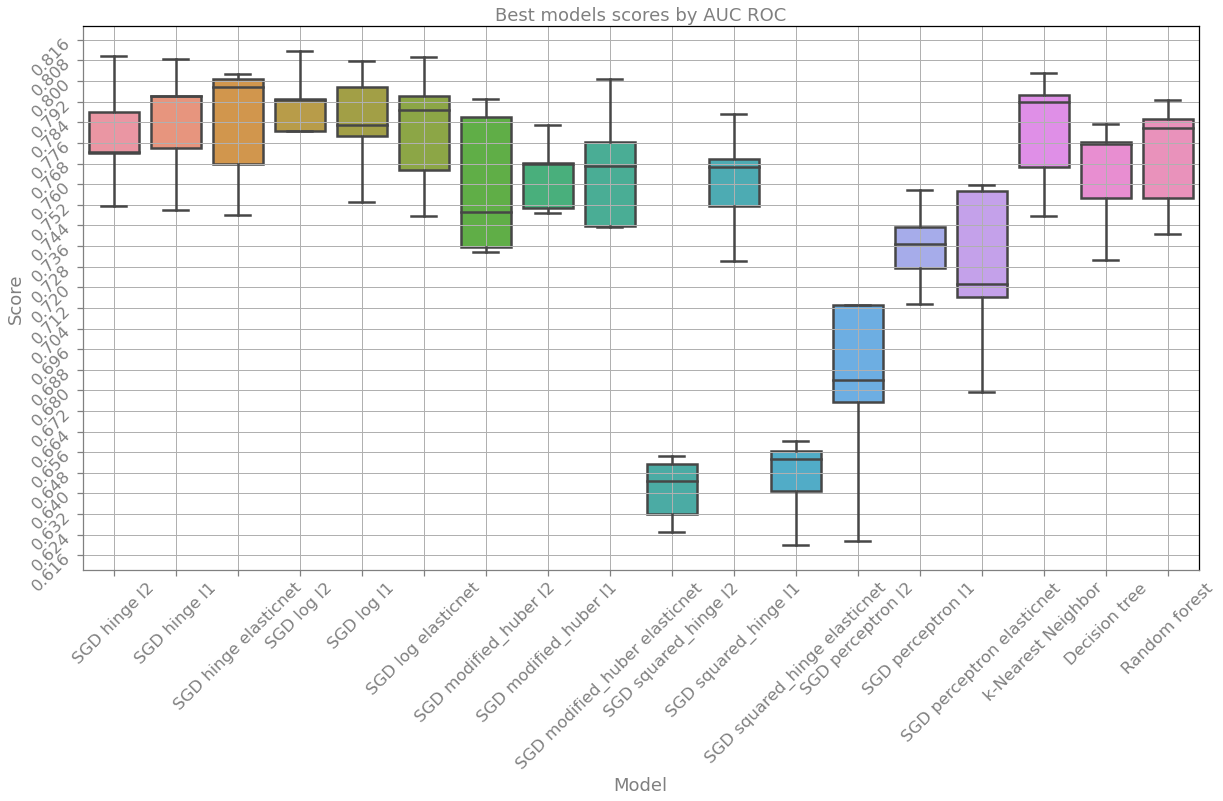

In [166]:
plt.figure(figsize=(20, 10))
plt.yticks(np.arange(0.6, 0.82, 0.008))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.boxplot(x=["SGD " + func + " " + pen for func in loss_funcs for pen in penalties] * 5 + 
                 ["k-Nearest Neighbor"] * 5 + ["Decision tree"] * 5 + ["Random forest"] * 5,
                 y=[*sgd_grid.cv_results_["split0_test_score"], *sgd_grid.cv_results_["split1_test_score"], 
                    *sgd_grid.cv_results_["split2_test_score"], *sgd_grid.cv_results_["split3_test_score"], 
                    *sgd_grid.cv_results_["split4_test_score"], *knn_scores, *dt_scores, *rnd_dt_scores],
                showfliers = False)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_title("Best models scores by AUC ROC", color=tick_color)
ax.set_xlabel("Model", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.tick_params(axis="both", colors=tick_color, labelrotation=45)

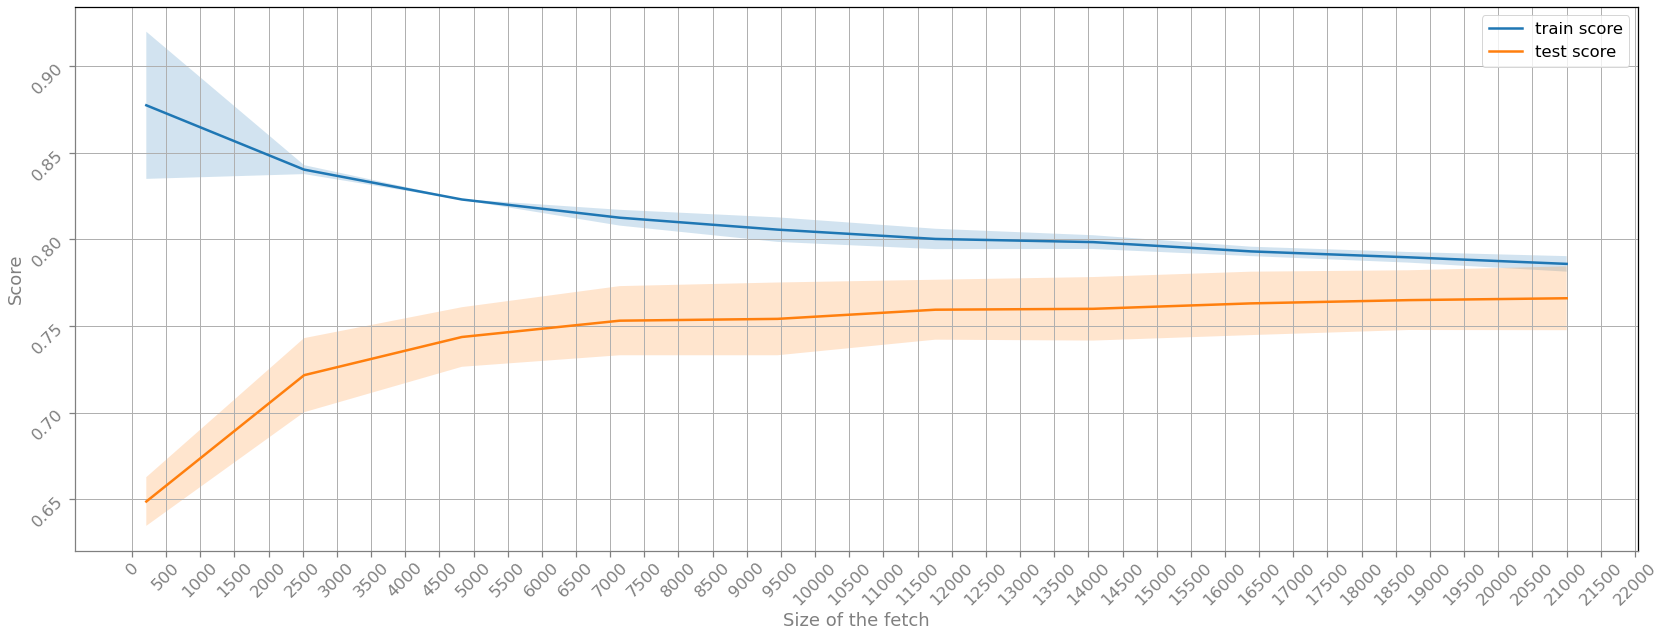

In [167]:
train_sizes, train_scores, valid_scores = learning_curve(
    DecisionTreeClassifier(max_depth=6, criterion="entropy"),
    X_scaled, y, cv=5, train_sizes=np.linspace(0.01, 1, 10), n_jobs=-1, scoring="roc_auc")

train_mean = np.array([arr.mean() for arr in train_scores])
train_std = np.array([arr.std() for arr in train_scores])
test_mean = np.array([arr.mean() for arr in valid_scores])
test_std = np.array([arr.std() for arr in valid_scores])

plt.figure(figsize=(28, 10))
plt.xticks(range(0, len(X_scaled), 500))
# plt.yticks(np.arange(0.6, 0.72, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=train_sizes, y=train_mean, label="train score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=train_mean - train_std, 
                y2=train_mean + train_std)
sns.lineplot(x=train_sizes, y=test_mean, label="test score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=test_mean - test_std, 
                y2=test_mean + test_std)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Size of the fetch", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper right")
ax.tick_params(axis="both", colors=tick_color, labelrotation=45)

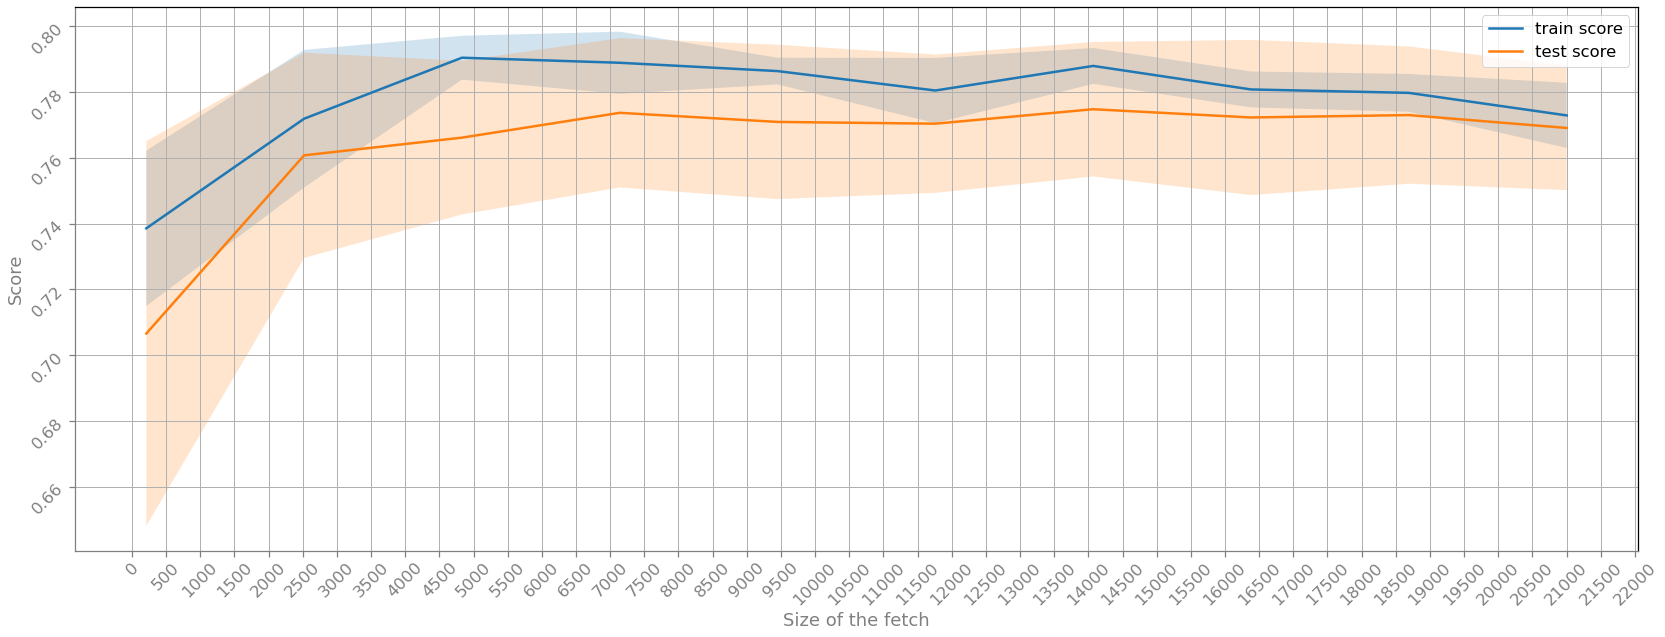

In [169]:
train_sizes, train_scores, valid_scores = learning_curve(
    linear_model.SGDClassifier(n_jobs=-1, loss="hinge", penalty="l1"),
    X_scaled, y, cv=5, train_sizes=np.linspace(0.01, 1, 10), n_jobs=-1, scoring="roc_auc")

train_mean = np.array([arr.mean() for arr in train_scores])
train_std = np.array([arr.std() for arr in train_scores])
test_mean = np.array([arr.mean() for arr in valid_scores])
test_std = np.array([arr.std() for arr in valid_scores])

plt.figure(figsize=(28, 10))
plt.xticks(range(0, len(X_scaled), 500))
# plt.yticks(np.arange(0.6, 0.72, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=train_sizes, y=train_mean, label="train score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=train_mean - train_std, 
                y2=train_mean + train_std)
sns.lineplot(x=train_sizes, y=test_mean, label="test score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=test_mean - test_std, 
                y2=test_mean + test_std)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Size of the fetch", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper right")
ax.tick_params(axis="both", colors=tick_color, labelrotation=45)

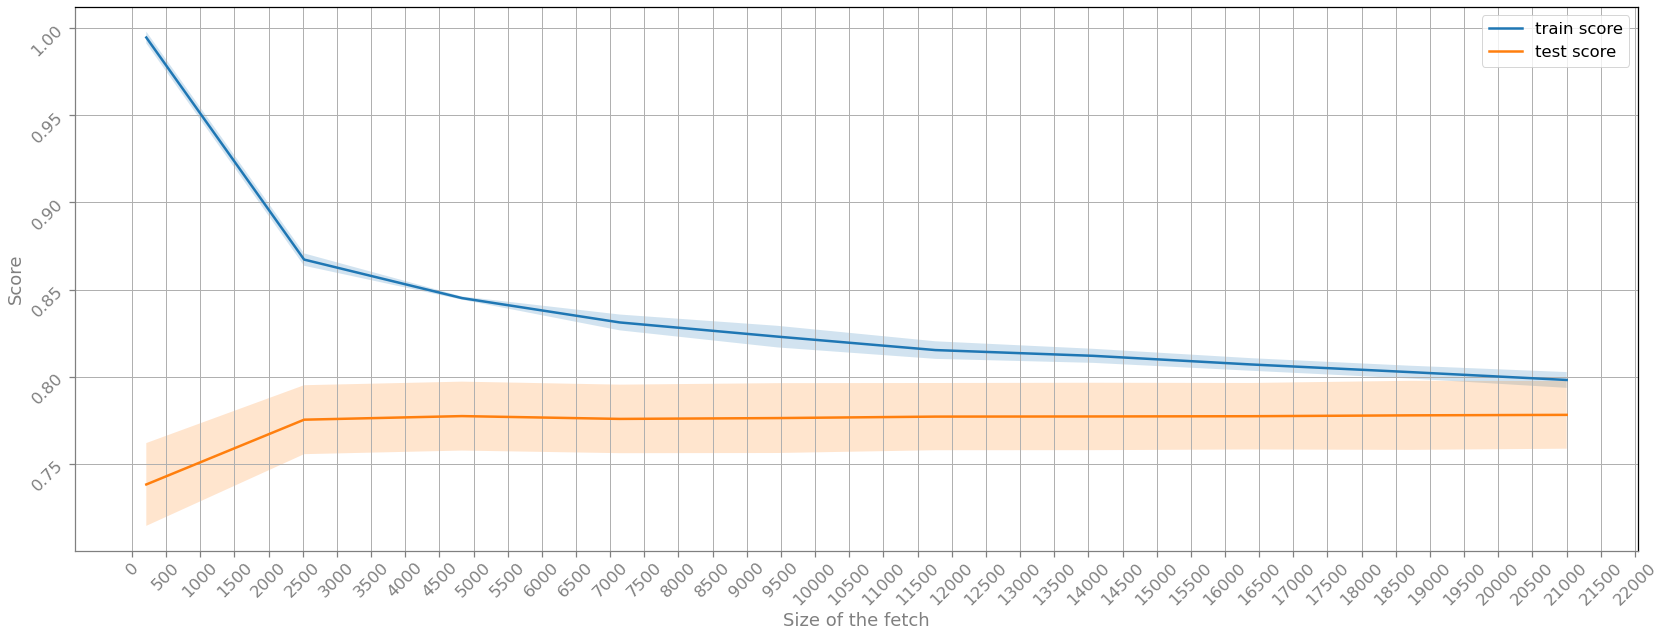

In [170]:
train_sizes, train_scores, valid_scores = learning_curve(
    RandomForestClassifier(n_estimators=70, n_jobs=-1, criterion="entropy", max_depth=6),
    X_scaled, y, cv=5, train_sizes=np.linspace(0.01, 1, 10), n_jobs=-1, scoring="roc_auc")

train_mean = np.array([arr.mean() for arr in train_scores])
train_std = np.array([arr.std() for arr in train_scores])
test_mean = np.array([arr.mean() for arr in valid_scores])
test_std = np.array([arr.std() for arr in valid_scores])

plt.figure(figsize=(28, 10))
plt.xticks(range(0, len(X_scaled), 500))
# plt.yticks(np.arange(0.6, 0.72, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=train_sizes, y=train_mean, label="train score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=train_mean - train_std, 
                y2=train_mean + train_std)
sns.lineplot(x=train_sizes, y=test_mean, label="test score")
ax.fill_between(x=train_sizes, alpha=0.2, 
                y1=test_mean - test_std, 
                y2=test_mean + test_std)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("Size of the fetch", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.legend(loc="upper right")
ax.tick_params(axis="both", colors=tick_color, labelrotation=45)

### (3 балла) Смешивание моделей (blending)

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**#** Возьмём алгоритм SGD с шарнирной функцией потерь и эластичной сетью в качестве регуляризатора и модель kNN

**(2 балла) Задание 10.**
При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель, например, класс *GridSearchCV*, *learning_curve* и другие.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [171]:
class MyClf(BaseEstimator, ClassifierMixin):
    clf1, clf2, a = None, None, None
    
    def __init__(self, clf1, clf2, a=None):
        self.clf1 = clf1
        self.clf2 = clf2
        self.a = a
           
    def fit(self, X, y):
        if not hasattr(self.clf1, "classes_"):
            self.clf1.fit(X, y)
        if not hasattr(self.clf2, "classes_"):
            self.clf2.fit(X, y)
        
    def predict_proba(self, X):
        ans1 = self.clf1.predict_proba(X)
        ans2 = self.clf2.predict_proba(X)
        assert ans1 is not None, "ans1 is None"
        assert ans2 is not None, "ans2 is None"
        ans = ans1 * self.a + ans2 * (1 - self.a)
        return ans
    
    def predict(self, X):
        probs = self.predict_proba(X)
        return [arr[0] > 0.5 for arr in probs]

**(1 балл) Задание 11.** Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

**#** Если прирост качества и есть, то совсем небольшой. 
Зато время, затрачиваемое на поиск по сетке увеличилось в разы.
Наверное можно было сократить время на поиск, написав свой Grid Search (который не выполнял бы fit каждый раз заново),
но поскольку смешение моделей не принесло никаких улучшений, было принято решение оставить всё как есть)

**#** Смешение моделей может влиять на качество предсказаний, если модели основаны на принципиально разных предположениях и работают принципиально разным образом.
Тогда мы могли бы взять лучшие предсказания обеих моделей и объединить их, тем самым увеличив количество хороших предсказаний.

In [178]:
%%capture

a_param = np.linspace(0.2, 0.8, 7)
myclf_grid = GridSearchCV(MyClf(KNeighborsClassifier(n_jobs=-1, n_neighbors=150, metric="manhattan"), 
                                CalibratedClassifierCV(linear_model.SGDClassifier(n_jobs=-1, loss="hinge", penalty="elasticnet"), cv=5, method='sigmoid')), 
                          {"a":a_param}, cv=5, n_jobs=-1, scoring="roc_auc")
myclf_grid.fit(X, y)

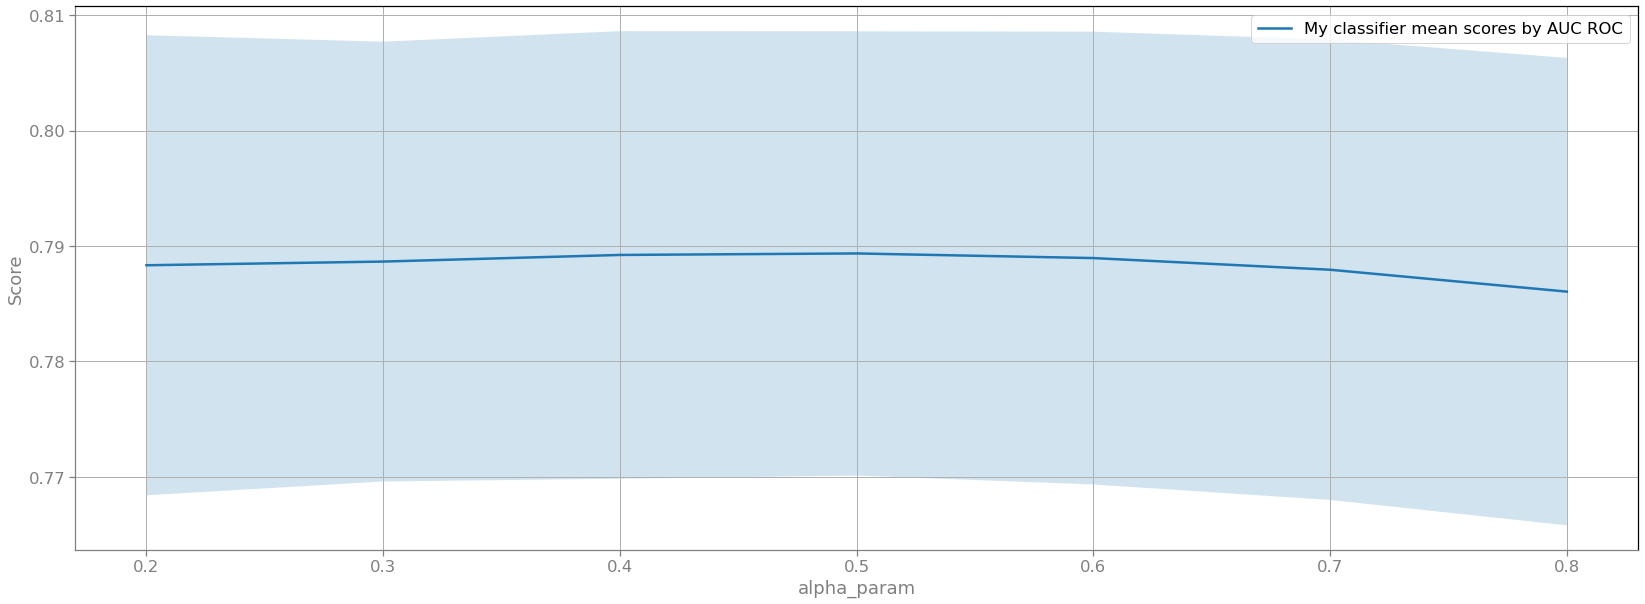

In [180]:
plt.figure(figsize=(28, 10))
plt.xticks(a_param)
# plt.yticks(np.arange(0.6, 0.8, 0.01))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x=a_param, y=myclf_grid.cv_results_["mean_test_score"], label="My classifier mean scores by AUC ROC")
ax.fill_between(x=a_param, alpha=0.2, 
                y1=myclf_grid.cv_results_["mean_test_score"] - myclf_grid.cv_results_["std_test_score"], 
                y2=myclf_grid.cv_results_["mean_test_score"] + myclf_grid.cv_results_["std_test_score"])
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_xlabel("alpha_param", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.tick_params(axis="both", colors=tick_color)

## (2 балла) Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**(2 балла) Задание 12.** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

**#k-Nearest Neighbor classifier.** Этот алгоритм даёт весьма неплохие результаты уже при небольшом числе соседей (50-100).
При дальнейшем увеличении этого параметра можно добиться большего результата, но сложность вычислений растёт в разы.
Выбор метрики никак не влияет на результат работы алгоритма в нашем случае.
Этот алгоритм занял **второе место** в "личном зачёте", уступив лишь SGD.
Из рассмотренных моделей это **самый долгий алгоритм**.

**#Decision Tree classifier.** Весьма неплохой алгоритм с точки зрения скорости работы и сложности настройки.
Наилучшие результаты получаются при ограничении максимальной глубины дерева в 5-6 рёбер.
Выбор критерия оценки практически не повлиял на качество.
Это **самый быстрый алгоритм** из рассмотренных нами.
Этот алгоритм занял **последнее место** в личном зачёте.

**#Random Forest classifier.** Ещё один **долгий алгоритм**, основанный на предыдущем.
Качество его предсказаний выше, чем у простого дерева решений, тем не менее он занимает **третье место**.
С увеличением количества деревьев безусловно растёт предсказательная способность алгоритма.
Оптимальное количество для нашей задачи (когда прирост качества стал очень мал по отношению к приросту времени выполнения) стало 100 деревьев.
Выбор критерия оценки так же, как и в Decision Tree не влияет на качество.

**#Stochastic Gradient Descent classifier.** Очень интересный алгоритм, требующий тонкой настройки.
Лучше всех себя показали шарнирная и логарифмическая функции потерь, независимо от выбора второго параметра.
В конечном счёте была выбрана модификация с шарнирной функцией потерь и "эластичной сетью" в качестве регуляризатора.
Этот алгоритм занял **первое место** в личном зачёте.
Вдобавок, он очень быстро работает, незначительно уступая лишь одиночному дереву решений.

**#Blending of algorithms.** Как ни странно, смешение моделей не дало значительного улучшения предсказательной способности.
Тем не менее, небольшое улучшение всё-таки есть, а разброс ответов для разных выборок значительно уменьшился.
Эта модель занимает **гран-при** в нашем исследовании.
К сожалению, скорость вычислений оставляет желать лучшего из-за использования медленного kNN и неоптимизированного поиска по сетке.

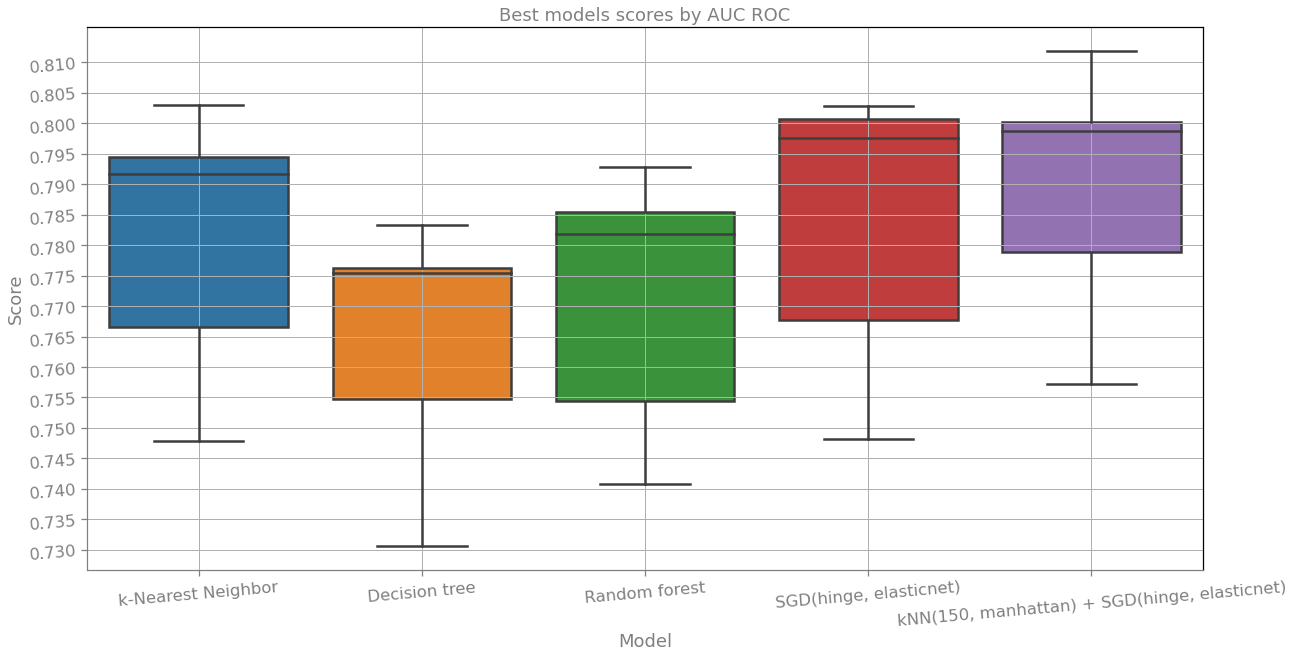

In [181]:
sgd_scores = [sgd_grid.cv_results_["split0_test_score"][2], sgd_grid.cv_results_["split1_test_score"][2],
              sgd_grid.cv_results_["split2_test_score"][2], sgd_grid.cv_results_["split3_test_score"][2],
              sgd_grid.cv_results_["split4_test_score"][2]]
blended_scores = [myclf_grid.cv_results_["split0_test_score"][3], myclf_grid.cv_results_["split1_test_score"][3],
                  myclf_grid.cv_results_["split2_test_score"][3], myclf_grid.cv_results_["split3_test_score"][3],
                  myclf_grid.cv_results_["split4_test_score"][3]]

plt.figure(figsize=(20, 10))
plt.yticks(np.arange(0.73, 0.81, 0.005))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.boxplot(x=["k-Nearest Neighbor"] * 5 + ["Decision tree"] * 5 + ["Random forest"] * 5 +
                 ["SGD(hinge, elasticnet)"] * 5 + ["kNN(150, manhattan) + SGD(hinge, elasticnet)"] * 5,
                 y=[*knn_scores, *dt_scores, *rnd_dt_scores, *sgd_scores, *blended_scores],
                showfliers = False)
ax.spines["bottom"].set_color(tick_color)
ax.spines["left"].set_color(tick_color)
ax.grid()
ax.set_title("Best models scores by AUC ROC", color=tick_color)
ax.set_xlabel("Model", color=tick_color)
ax.set_ylabel("Score", color=tick_color)
ax.tick_params(axis="both", colors=tick_color, labelrotation=5)

Не забудьте воспользоваться всеми полученными наработками. Отправьте результаты предсказаний ваших моделей для матчей из test.csv в соревнование на [kaggle](https://www.kaggle.com/t/55797188147b4b519023923730aa5545). Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.